# WARNING <a class="tocSkip">

Material at the end of this notebook requires the installation of an external library, or the use of an appropriate container on Windows.

The cells are pre-run when you open so you can see the outputs,

but be careful about doing a "run all" as you will lose this output unless you have the library/container installed correctly.

Instructions to install the library are given below, but this isn't easy, and is not a requirement for this module.

In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
div.text_cell_render{
    font-size:17pt;
}
</style>

# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 12: Finite Element Methods (FEM) 2 <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Implementation-of-the-FEM---local-assembly-over-elements" data-toc-modified-id="Implementation-of-the-FEM---local-assembly-over-elements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementation of the FEM - local assembly over elements</a></span><ul class="toc-item"><li><span><a href="#The-underlying-idea" data-toc-modified-id="The-underlying-idea-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The underlying idea</a></span></li><li><span><a href="#Local-assembly-for-the-mass-matrix" data-toc-modified-id="Local-assembly-for-the-mass-matrix-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Local assembly for the mass matrix</a></span></li><li><span><a href="#Example---projection" data-toc-modified-id="Example---projection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Example - projection</a></span></li><li><span><a href="#Unstructured-mesh-data-structures-(the-connectivity-matrix)" data-toc-modified-id="Unstructured-mesh-data-structures-(the-connectivity-matrix)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Unstructured mesh data structures (the connectivity matrix)</a></span></li><li><span><a href="#Quadrature-over-the-local-element-(change-of-variables-to-a-reference-element)" data-toc-modified-id="Quadrature-over-the-local-element-(change-of-variables-to-a-reference-element)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Quadrature over the local element (change of variables to a reference element)</a></span></li><li><span><a href="#Transformation-to-the-reference-element" data-toc-modified-id="Transformation-to-the-reference-element-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Transformation to the reference element</a></span><ul class="toc-item"><li><span><a href="#Aside:-quadratic-basis-functions" data-toc-modified-id="Aside:-quadratic-basis-functions-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Aside: quadratic basis functions</a></span></li></ul></li><li><span><a href="#Local-assembly-for-integrands-that-involve-derivatives" data-toc-modified-id="Local-assembly-for-integrands-that-involve-derivatives-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Local assembly for integrands that involve derivatives</a></span></li></ul></li><li><span><a href="#Time-stepping" data-toc-modified-id="Time-stepping-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time-stepping</a></span></li><li><span><a href="#A-finite-element-solver-in-1D" data-toc-modified-id="A-finite-element-solver-in-1D-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A finite element solver in 1D</a></span><ul class="toc-item"><li><span><a href="#Mesh-generation" data-toc-modified-id="Mesh-generation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Mesh generation</a></span></li><li><span><a href="#Generate-unstructured-mesh-data-structures" data-toc-modified-id="Generate-unstructured-mesh-data-structures-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generate unstructured mesh data structures</a></span></li><li><span><a href="#Define-basis-functions-and-their-derivatives" data-toc-modified-id="Define-basis-functions-and-their-derivatives-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Define basis functions and their derivatives</a></span></li><li><span><a href="#Define-quadrature-rule" data-toc-modified-id="Define-quadrature-rule-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Define quadrature rule</a></span></li><li><span><a href="#Local-element-assembly" data-toc-modified-id="Local-element-assembly-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Local element assembly</a></span></li><li><span><a href="#Global-assembly" data-toc-modified-id="Global-assembly-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Global assembly</a></span></li><li><span><a href="#Apply-boundary-conditions" data-toc-modified-id="Apply-boundary-conditions-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Apply boundary conditions</a></span></li><li><span><a href="#Define-initial-condition" data-toc-modified-id="Define-initial-condition-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Define initial condition</a></span></li><li><span><a href="#Set-up-problem-and-time-step" data-toc-modified-id="Set-up-problem-and-time-step-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Set-up problem and time step</a></span></li><li><span><a href="#Post-processing-(plotting)" data-toc-modified-id="Post-processing-(plotting)-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Post-processing (plotting)</a></span></li></ul></li><li><span><a href="#Higher-dimensions" data-toc-modified-id="Higher-dimensions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Higher dimensions</a></span><ul class="toc-item"><li><span><a href="#Triangular-meshes" data-toc-modified-id="Triangular-meshes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Triangular meshes</a></span></li><li><span><a href="#From-a-mesh-to-basis-functions" data-toc-modified-id="From-a-mesh-to-basis-functions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>From a mesh to basis functions</a></span></li><li><span><a href="#Connectivity-in-2D" data-toc-modified-id="Connectivity-in-2D-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Connectivity in 2D</a></span></li><li><span><a href="#Local-assembly,-the-reference-element-and-implementing-FEM-in-2D" data-toc-modified-id="Local-assembly,-the-reference-element-and-implementing-FEM-in-2D-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Local assembly, the reference element and implementing FEM in 2D</a></span><ul class="toc-item"><li><span><a href="#But-should-we?" data-toc-modified-id="But-should-we?-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>But should we?</a></span></li></ul></li></ul></li><li><span><a href="#Mesh-generation-in-2D-[$\star$]" data-toc-modified-id="Mesh-generation-in-2D-[$\star$]-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mesh generation in 2D [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Mesh-quality-and-mesh-improvement" data-toc-modified-id="Mesh-quality-and-mesh-improvement-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Mesh quality and mesh improvement</a></span></li></ul></li><li><span><a href="#Firedrake---solving-2D-problems-and-a-gallery-of-examples--[$\star$]" data-toc-modified-id="Firedrake---solving-2D-problems-and-a-gallery-of-examples--[$\star$]-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Firedrake - solving 2D problems and a gallery of examples  [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Installing-Firedrake" data-toc-modified-id="Installing-Firedrake-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Installing Firedrake</a></span><ul class="toc-item"><li><span><a href="#Windows-tips-(partly-as-a-record-for-myself)" data-toc-modified-id="Windows-tips-(partly-as-a-record-for-myself)-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Windows tips (partly as a record for myself)</a></span></li></ul></li><li><span><a href="#Projection" data-toc-modified-id="Projection-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Projection</a></span></li><li><span><a href="#Solving-an-elliptic-problem---the-2D-Poisson-equation" data-toc-modified-id="Solving-an-elliptic-problem---the-2D-Poisson-equation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Solving an elliptic problem - the 2D Poisson equation</a></span><ul class="toc-item"><li><span><a href="#Variational-form" data-toc-modified-id="Variational-form-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Variational form</a></span></li></ul></li><li><span><a href="#The-diffusion-equation" data-toc-modified-id="The-diffusion-equation-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>The diffusion equation</a></span><ul class="toc-item"><li><span><a href="#Variational-form" data-toc-modified-id="Variational-form-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Variational form</a></span></li></ul></li><li><span><a href="#The-advection-equation-in-two-dimensions" data-toc-modified-id="The-advection-equation-in-two-dimensions-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>The advection equation in two dimensions</a></span><ul class="toc-item"><li><span><a href="#Runge-Kutta-time-integration" data-toc-modified-id="Runge-Kutta-time-integration-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Runge-Kutta time integration</a></span></li><li><span><a href="#Initial-condition-and-velocity-field" data-toc-modified-id="Initial-condition-and-velocity-field-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Initial condition and velocity field</a></span></li></ul></li></ul></li><li><span><a href="#Incompressible-Navier-Stokes-(CFD)-examples-using-Firedrake-[$\star\star$]" data-toc-modified-id="Incompressible-Navier-Stokes-(CFD)-examples-using-Firedrake-[$\star\star$]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Incompressible Navier-Stokes (CFD) examples using Firedrake [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Pressure-driven-channel" data-toc-modified-id="Pressure-driven-channel-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Pressure driven channel</a></span></li><li><span><a href="#Lid-driven-cavity" data-toc-modified-id="Lid-driven-cavity-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Lid driven cavity</a></span></li><li><span><a href="#Flow-past-a-cylinder" data-toc-modified-id="Flow-past-a-cylinder-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Flow past a cylinder</a></span><ul class="toc-item"><li><span><a href="#Geometry-description-and-mesh-generation" data-toc-modified-id="Geometry-description-and-mesh-generation-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Geometry description and mesh generation</a></span></li></ul></li><li><span><a href="#Backward-facing-step" data-toc-modified-id="Backward-facing-step-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Backward facing step</a></span><ul class="toc-item"><li><span><a href="#Geometry-description-and-mesh-generation" data-toc-modified-id="Geometry-description-and-mesh-generation-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Geometry description and mesh generation</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Learning objectives <a class="tocSkip">
 

- To understand the *assembly* process which will allow us to easily extend what we say in the previous lecture to higher dimensions.


- To build on what we saw in the previous lecture to develop a FEM based solver in 1D for advection-diffusion.


- To understand (unstructured mesh) data structures in higher dimensions.


- To see how appropriate libraries (e.g. Firedrake) can be used to develop FEM based solvers for complex PDEs in high dimensions, and ultimately to see how we can perform complex CFD with models we can develop in only a relatively small number of lines of code.

In [2]:
%precision 6
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
from pprint import pprint

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Implementation of the FEM - local assembly over elements

## The underlying idea

When we formed the discretisation matrices in the examples we considered in the previous lecture (both the projection of a given function as well as the solution of BVPs examples), recall that we looped over the nodes and did an integral over the elements either side (in 1D, and apart from at boundaries).

These nodes corresponded with the entry of the load vector we were computing, or said another way the trial function corresponding to that node.

For each node we constructed the corresponding entry of the load vector by integrating using Simpson's rule the appropriate integral ($f\,\phi_i$) over the elements on each side of that node.

In general we constructed the left hand side discretisation matrix directly (i.e. we wrote functions that used `np.diag`) using our analytical knowledge of what the integrals (e.g. of $\phi_i\,\phi_j$ in the case of the mass matrix, and products of the derivatives of the basis functions in the BVP case), and the fact that they took a simple tridiagonal form. 

Recall that we did demonstrate through an application of Simpson's rule that quadrature recreated our analytical result for the mass matrix.

<br>

However, note that this means of constructing the left hand side matrix won't be possible for more complex problems, and in the case of the load vector an approach of looping over nodes and then visiting each surrounding element won't be optimal in higher dimensions

A better approach, termed ***assembly*** or ***local assembly***, which addresses both issues is instead to loop ***over the elements***, compute the required integrals only over that element, and *add* the appropriate results of these integrals into the appropriate locations of the global discretisation matrices.

To help clarify this idea let's consider the example of the mass matrix.

## Local assembly for the mass matrix

Recall from last lecture that the mass matrix $M$ is defined to be the matrix with the entries

$$ M_{ij} = \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx. $$

We noted that given the form of our basis functions (i.e. having finite compact support) that $M$ is *sparse* - for a given row, $i$,  the integrand in the definition above will be zero for all $j$ values other than $j=i$, and $j=i\pm 1$, i.e. the mass matrix is tridiagonal in 1D.

We demonstrated that an internal row (the $i$-th row) of the tridiagonal mass matrix has the entries

$$\left[0 \;\;\;\;\; \cdots \;\;\;\;\; 0 \;\;\;\;\; \frac{\Delta x_{i-1}}{6} \;\;\;\;\;  \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}  \;\;\;\;\; \frac{\Delta x_{i}}{6} \;\;\;\;\; 0 \;\;\;\;\; \cdots \;\;\;\;\;  0  \right], $$

with the first and last rows being

$$\left[\frac{\Delta x_{0}}{3}  \;\;\;\;\; \frac{\Delta x_{0}}{6} \;\;\;\;\; 0 \;\;\;\;\; \cdots \;\;\;\;\;  0  \right], $$

and

$$\left[0 \;\;\;\;\; \cdots \;\;\;\;\; 0 \;\;\;\;\; \frac{\Delta x_{n}}{6} \;\;\;\;\;  \frac{\Delta x_{n}}{3}\right]. $$


Combining we have

$$ M = 
\begin{pmatrix}
\frac{\Delta x_0}{3}  & \frac{\Delta x_0}{6} & & &  
\\
\frac{\Delta x_0}{6}  & \left(\frac{\Delta x_0}{3} + \frac{\Delta x_1}{3}\right) & \frac{\Delta x_1}{6} & &  \\
&\frac{\Delta x_1}{6}  & \left(\frac{\Delta x_1}{3} + \frac{\Delta x_2}{3}\right) & \frac{\Delta x_2}{6}  &  \\
&  &  \ddots & &  
\\
& &\frac{\Delta x_{n-1}}{6}  & \left(\frac{\Delta x_{n-1}}{3} + \frac{\Delta x_n}{3}\right) & \frac{\Delta x_n}{6}  \\
& &   &  \frac{\Delta x_n}{6} & \frac{\Delta x_n}{3}
\end{pmatrix}.
$$

Notice first that this is equivalent to [NB. I'm using notation that assumes that all entries not explicitly given in the presented matrices are zero]


$$ M = 
\begin{bmatrix}
\frac{\Delta x_0}{3} & \frac{\Delta x_0}{6} & &  \\
\frac{\Delta x_0}{6} & \frac{\Delta x_0}{3} & & \\ 
& & & \\
& & & \\
& & & \\
& & & 
\end{bmatrix} 
+
\begin{bmatrix}
& & & \\
& \frac{\Delta x_1}{3} & \frac{\Delta x_1}{6}  & \\ 
& \frac{\Delta x_1}{6} & \frac{\Delta x_1}{3}  &  \\
& & & \\
& & & \\
& & & 
\end{bmatrix} 
+ \ldots +
\begin{bmatrix}
& & & \\
& & & \\
& & & \\
& & & \\
& & \frac{\Delta x_n}{3} & \frac{\Delta x_n}{6} \\
& &\frac{\Delta x_n}{6}  & \frac{\Delta x_n}{3}  
\end{bmatrix},
$$

i.e. the global mass matrix is equivalent to the summation of ($n$, which is the number of elements) 
$2\times 2$ matrices which all take the form

$$\frac{1}{6}
\begin{bmatrix}
2 & 1\\
1 & 2
\end{bmatrix}{\Delta x_i}.
$$

Note that this smaller matrix only involves the size of element $i$, and as we shall see can be associated only with element $i$.  We therefore call it the ***local element mass matrix*** for element $i$.  Notice also that this same definition applies equally well to the first and last elements, i.e. we don't need to do anything special/different at boundaries (we will see that this is expected as we are dealing with each element in isolation, it's not important if it's next to the boundary or not).

Considering element $i$, we can see that the above $2\times 2$ sub-matrix block comes from the following contributions

$$
\begin{bmatrix}
\int_{e_i} \,\phi_i(x)\,\phi_i(x)\, dx     & \int_{e_i} \,\phi_i(x)\,\phi_{i+1}(x)\, dx \\
\int_{e_i} \,\phi_i(x)\,\phi_{i+1}(x)\, dx & \int_{e_i} \,\phi_{i+1}(x)\,\phi_{i+1}(x)\, dx
\end{bmatrix}
$$

where $e_i = [x_i,x_{i+1}]$ is the $i$-th element.

Note that when we sum up all these individual local mass matrices, each main diagonal (other than the first and last) will receive two contributions. Note that all that is happening here is what we saw analytically in the previous lecture when we integrated over the two elements either side of the node under consideration in order to derive an expression for the mass matrix.

To see that this makes sense another way, first we note that the total integral can be split up over elements:


\begin{align*}
M_{ij} &= \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx\\[5pt]
&= \sum_k\,\int_{e_k} \,\phi_i(x)\,\phi_j(x)\,  dx.
\end{align*}

Then we note that most of the elemental contributions will be zero since the integrand will be zero over them. For example, for the diagonal entries we only have to consider

\begin{align*}
M_{ii} 
& = \sum_k\,\int_{e_k} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{e_{i-1}} \,\phi_i(x)\,\phi_i(x)\,  dx + \int_{e_{i}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_i(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& \; \vdots\\[5pt]
& = \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}.
\end{align*}


<br>

The overall procedure underlying *local assembly* is therefore to


1. loop over elements


2. calculate the individual contributions to the local element mass matrix by considering combinations of the basis functions corresponding to the local node numbers (i.e. the four entries in the $2\times 2$ sub-matrix block above)


3. Identify the appropriate locations of the global mass matrix and *add* the current element's contributions to the values already in these locations


Note that for fully unstructured meshes in higher dimensions, there will be multiple contributions feeding into each entry of the global mass matrix (think multiple triangular elements surrounding a node/vertex).

Note also that exactly the same assembly procedure can be used to construct more complex discretisation matrices (e.g. the matrix $A$ in the BVP section) as well as the RHS load vectors.

## Example - projection

Let's demonstrate the assembly process through an example.

Recall our initial example from the previous lecture where we "projected" a general function $\,f\,$ into the space of p/w linear functions.

First let's run our code from the last lecture which involved us defining the mass matrix analytically, and computing the RHS load vector through a **loop over nodes** (and evaluating the integrals on the elements either side to compute the nodal entry in one go) - an approach we just said isn't really a viable approach in higher dimensions.

In [23]:
# to do this we need our Simpson's quadrature codes

def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

The following is the code we wrote to set-up and solve the appropriate matrix system to yield the solution at the mesh vertices in the last lecture - we repeat it here to give us something to verify our new approach/code against.

In [24]:
def f(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)

# discrete data
N_nodes = 4
N_elements = N_nodes - 1
dx = 1./N_elements
x_nodes = np.linspace(0,1,N_nodes)

def mass_matrix(x):
    dx = np.diff(x)
    M = np.zeros((len(x), len(x)))
    M[1:-1,1:-1] = np.diag(dx[:-1]/3  +  dx[1:]/3 , k=0) 
    M += np.diag(dx/6   , k=-1) + np.diag(dx/6   , k=1)
    M[0,0] = dx[0]/3
    M[-1,-1] = dx[-1]/3
    return M

Mass_CG = mass_matrix(x_nodes)

# construct RHS vector
RHS_CG = np.zeros(N_nodes)

def hat_function(i, x_nodes):
    """ Top hat basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat


# loop over internal nodes

for node in range(1, N_nodes-1):
    # and integrate our function multiplied by the corresponding cts basis function
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS_CG[node] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], #
                                 integrand, 100 )
    
    
# now the end nodes
node = 0
# integrate our function multiplied by the corresponding cts basis function
phi_i = hat_function(node, x_nodes)
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node], x_nodes[node+1], 
                                       integrand, 50 )
node = N_nodes-1
# integrate our function multiplied by the corresponding cts basis function
phi_i = hat_function(node, x_nodes)
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node-1], x_nodes[node], integrand, 50 )

approx_CG = sl.solve(Mass_CG, RHS_CG)

print('Mass matrix =')
pprint(Mass_CG)
print('\nRHS vector =')
pprint(RHS_CG)

Mass matrix =
array([[0.11111111, 0.05555556, 0.        , 0.        ],
       [0.05555556, 0.22222222, 0.05555556, 0.        ],
       [0.        , 0.05555556, 0.22222222, 0.05555556],
       [0.        , 0.        , 0.05555556, 0.11111111]])

RHS vector =
array([ 0.13686339,  0.19747647, -0.1988013 , -0.0924463 ])


Note that in the code above we looped over the nodes, and for the internal nodes computed the appropriate integral over the elements either side of the node in one go to compute the RHS vector, and we used our analytical function for the mass matrix.

<br>

Let's recode this using *local assembly* for both the mass matrix and the RHS vector, and check we get the same result.

We need to:


1. Loop over elements.


2. Loop over combinations of the local basis functions (giving the 4 entries of the $2\times 2$ elemental matrix).


3. Perform the quadratures only over the local element (to actually compute these 4 entries).


4. Add in the contributions to the appropriate locations of the global matrices/vectors.

## Unstructured mesh data structures (the connectivity matrix)

In order to know where the local contributions contribute to the global matrices, we make use of the so-called *connectivity matrix*.

It will seem a triviality in 1D, but it's vitally important in higher dimensions. We'll give the 2D generalisation later.

The following image presents a schematic of an unstructured mesh data structure, or connectivity, in the simple 1D case and assuming that we have two nodes per element (i.e. the p/w linear case), and that these are located at the ends of the elements (other more complex choices are possible!)

<img src="figures/connectivity_1d.svg" style="width: 500px">

- Blue are the *element numbers*


- Red are the *local node numbers* (as in local to that element)


- Black are the *global node numbers*


The connectivity can be described by the so-called connectivity matrix, which again in 1D takes the particularly simple form

\begin{pmatrix}
    0 & 1 & \ldots & i-1 & i   & i+1 & \ldots & n \\
    1 & 2 & \ldots & i   & i+1 & i+2 & \ldots & n+1
\end{pmatrix}

the column being the element, the row the local node number, and the entry of the matrix then being the global node number.

The size of the connectivity matrix is therefore: 

$$\text{the number of local nodes per element}\;\;\times\;\;\text{the number of elements},$$

and it provides a mapping from elements to global node numbers that we use to tell us where to add in the entries we compute over a local element into the global discretisation matrices.

In [25]:
# the connectivity matrix in 1D we need to use for this case.

# mesh information
N_nodes = 15
N_elements = N_nodes - 1
x_nodes = np.linspace(0,1,N_nodes)
dx = np.diff(x_nodes)

# number of nodes per element 
N_loc = 2

# the connectivity matrix giving us a mapping from local to global numbering
connectivity_matrix = np.zeros((N_loc, N_elements), dtype=int)
for element in range (N_elements):
    connectivity_matrix[0, element] = element
    connectivity_matrix[1, element] = element + 1
    
print(connectivity_matrix)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]]


Now let's write some code to perform assembly to compute both the mass matrix as well as the RHS load vector, and check that we get the same results as our previous implementation which returned

```Python
Mass matrix =
array([[0.11111111, 0.05555556, 0.        , 0.        ],
       [0.05555556, 0.22222222, 0.05555556, 0.        ],
       [0.        , 0.05555556, 0.22222222, 0.05555556],
       [0.        , 0.        , 0.05555556, 0.11111111]])

RHS vector =
array([ 0.13686339,  0.19747647, -0.1988013 , -0.0924463 ])
```

M = 
array([[0.02380952, 0.01190476, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01190476, 0.04761905, 0.01190476, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01190476, 0.04761905, 0.01190476, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01190476, 0.04761905, 0.01190476,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01190476, 0.04761905,
        0.01190476, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.     

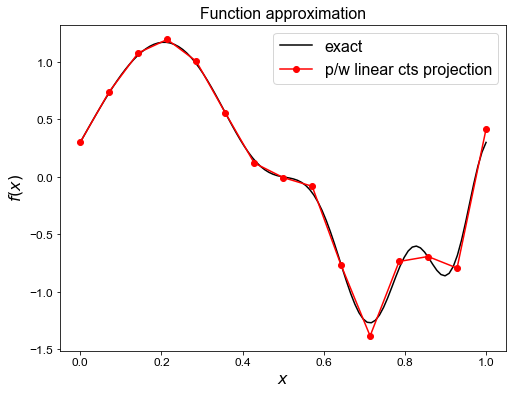

In [26]:
# project f(x) onto p/w linears using local assembly to form mass matrix and RHS load vector

def f(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)
          
# construct mass matrix and RHS vector using **local assembly**

# initialise M to a zero array - we will **add** in the entries
M = np.zeros((N_nodes, N_nodes))
RHS = np.zeros(N_nodes)
# loop over elements
for element in range(N_elements):
    # loop over the LOCAL nodes (i: test functions)
    for i_local in range(N_loc):
        # for this local node number on this element, 
        # compute the corresponding global node number
        i_global = connectivity_matrix[i_local, element]
        # add contribution to RHS vector - 
        # these integrals will be explained in the next cell
        if(i_local == 0):
            integrand = lambda xi: f( (x_nodes[i_global] + 
                                       0.5*dx[element]) + 
                                     0.5*dx[element]*xi ) * 0.5*(1-xi)
        else:
            # here i_global corresponds to node i+1 so redefine x(xi) accordingly
            integrand = lambda xi: f( ((x_nodes[i_global]-dx[element]) + 0.5*dx[element]) 
                                     + 0.5*dx[element]*xi ) * 0.5*(1+xi)
        RHS[i_global] += 0.5*dx[element] * simpsons_composite_rule(
            -1, 1, integrand, 100 )
        # Now for the mass matrix
        # loop over local nodes (j: trial functions)
        for j_local in range(N_loc):
            j_global = connectivity_matrix[j_local, element]
            if(i_local == 0):
                if(j_local == 0):      
                    # again, these integrals will be explained properly in the next cell
                    integrand = lambda xi: 0.5*(1-xi) * 0.5*(1-xi)
                else:
                    integrand = lambda xi: 0.5*(1-xi) * 0.5*(1+xi)
            else:
                if(j_local == 0):           
                    integrand = lambda xi: 0.5*(1+xi) * 0.5*(1-xi)
                else:
                    integrand = lambda xi: 0.5*(1+xi) * 0.5*(1+xi)
            # add in the local contribution to the global mass matrix
            M[i_global,j_global] += 0.5*dx[element] * simpsons_rule(
                -1, 1, integrand, 1 )

print('M = ')       
pprint(M)
print('\nRHS = ')
pprint(RHS)

approx_CG = sl.solve(M, RHS)

print('\napprox_CG = ')
pprint(approx_CG)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
ax1.set_title('Function approximation', fontsize=16)
# plot the exact function on a fine mesh
x_fine = np.linspace(0,1,100)
ax1.plot(x_fine, f(x_fine), 'k-', label = 'exact')
ax1.plot(x_nodes, approx_CG , 'ro-', label='p/w linear cts projection')
ax1.legend(loc='best', fontsize=16);

## Quadrature over the local element (change of variables to a reference element)


We've played one final trick in the implementation above.

It turns out that, especially in higher dimensions and for more complicated basis functions, that it is advantageous to transform our integrals over each individual element (which each could be a different shape and size) so that they are all performed over the same "reference" element.

Consider the schematic below.


<img src="figures/reference_elements_1d.svg" style="width: 800px">

<br>

The left part shows the mesh in the real physical coordinate we want to compute our solution over; the right shows the reference element we compute integrals over, with the mappings between the two also indicated.

## Transformation to the reference element

It is common to define the reference element in 1D to be either $\,e_\text{ref}:=[0,1]\,$ or $\,e_\text{ref}:=[-1,1]\,$.  

As per the schematic we shall choose the latter option.

We use $\,\xi\,$ as the notation of the coordinate over the reference element.

We can then define the linear mapping between the physical $\,x\in[x_L, x_R]\,$ and the reference element $\,\xi\in[-1,1]\,$ via

\begin{align*} 
x &= \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\left(x_R - x_L\right)\xi \\[5pt]
&= \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\Delta x\,\xi.
\end{align*}

where $\,\Delta x = x_R-x_L\,$ is the *local* mesh size.

Integrals over a physical element $\,e_i\,$ can then be computed as in the following example of a mass matrix entry:

\begin{align*}
\int_{e_i} \,\phi_{i}(x)\,\phi_{i}(x)\, dx 
&\equiv 
\int_{x_i}^{x_{i+1}} \,\phi_{i}(x)\,\phi_{i}(x)\, dx \\[10pt]
& = 
\int_{-1}^{1} \,\phi_{i}(\xi)\,\phi_{i}(\xi)\, |J| \, d\xi\\[10pt]
& \equiv 
\int_{e_{\text{ref}}} \,\phi_{i}(\xi)\,\phi_{i}(\xi)\, |J| \, d\xi
\end{align*}

where $|J|$ is the Jacobian determinant which we always need to remember to include when we perform a [*change of variables in an integral*](http://mathworld.wolfram.com/ChangeofVariablesTheorem.html).

In our case

$$ J = \frac{dx}{d\xi} = \frac{1}{2}\Delta x,$$

where $\Delta x$ is understood to be the local element size.

We need to consider how the basis functions $\phi_i$ and $\phi_{i+1}$ are defined in terms of the variable $\xi$, i.e. what they look like in the reference element. But this is simple as we know for linear basis functions they are 1 at one node, 0 at the other, and linear in between. The two basis functions on the reference element are therefore in the linear case simply

$$ \phi_0(\xi) := \frac{1}{2}( 1 - \xi),\;\;\;\;\;\;\;\; \phi_1(\xi) := \frac{1}{2}( 1 + \xi), $$

where the subscripts 0 and 1 refer to the *local* node number on the element.

These take a particularly simple form; this is one of the advantages of the reference element approach and extends to higher order elements. 

This is why in the code above we defined one of the integrands to be

> `integrand = lambda xi: 0.5*(1-xi) * 0.5*(1-xi)`

and multiplied through by half the element size after computing the integral of this over the interval $[-1,1]$:

> `M[i_global,j_global] += 0.5*dx[element] * simpsons_rule(-1, 1, integrand, 1 )`

and for the RHS vector why the source function argument takes the form:

> `f( (x_nodes[i_global] + 0.5*dx[element]) + 0.5*dx[element]*xi ) `

where we use the fact that $\frac{1}{2}\left(x_L+x_R\right)+ \frac{1}{2}\Delta x\,\xi= \left(x_L + \frac{1}{2}\Delta x\right) + \frac{1}{2}\Delta x\,\xi$.

### Aside: quadratic basis functions

As a further example let's consider what quadratic basis functions would look like, and how easily they can be defined, on the reference element:

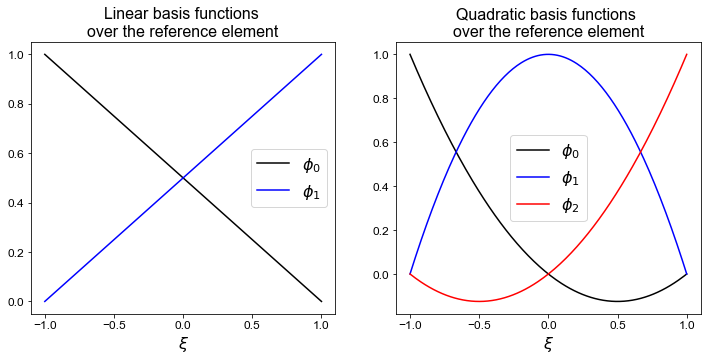

In [27]:
fig = plt.figure(figsize=(12, 5))
fig.tight_layout(w_pad=6, h_pad=6)
ax1 = fig.add_subplot(121)
ax1.set_xlabel(r'$\xi$', fontsize=16)
ax1.set_title('Linear basis functions \nover the reference element', 
              fontsize=16)
xi = np.linspace(-1, 1, 200)
# the two linear basis functions
ax1.plot(xi, 0.5*(1-xi), 'k-', label='$\phi_0$')
ax1.plot(xi, 0.5*(1+xi), 'b-', label='$\phi_1$')
ax1.legend(loc='best', fontsize=16)

ax1 = fig.add_subplot(122)
ax1.set_xlabel(r'$\xi$', fontsize=16)
ax1.set_title('Quadratic basis functions \nover the reference element', 
              fontsize=16)
xi = np.linspace(-1, 1, 200)
# the three quadratic basis functions
ax1.plot(xi, 0.5*(xi-1)*xi, 'k-', label='$\phi_0$')
ax1.plot(xi, 1 - xi**2, 'b-', label='$\phi_1$')
ax1.plot(xi, 0.5*(xi+1)*xi, 'r-', label='$\phi_2$')
ax1.legend(loc='best', fontsize=16)

**The mass matrix**

Following through the example case of the mass matrix and p/w linear basis functions we have

\begin{align*}
\int_{e_i} \,\phi_{i}(x)\,\phi_{i}(x)\, dx 
&\equiv 
\int_{x_i}^{x_{i+1}} \,\phi_{i}(x)\,\phi_{i}(x)\, dx \\[10pt]
& = 
\int_{-1}^{1} \,\phi_{0}(\xi)\,\phi_{0}(\xi)\, |J| \, d\xi\\[10pt]
& = \int_{-1}^{1} \, \frac{1}{2}( 1 - \xi) \, \frac{1}{2}( 1 - \xi) \, \frac{\Delta x_i}{2} \, d\xi
\\[10pt]
& = \frac{\Delta x_i}{8} \int_{-1}^{1} \, ( 1 - \xi)^2 \,  d\xi
\\[10pt]
& = \frac{\Delta x_i}{8} \left[ -\frac{1}{3}( 1 - \xi)^3 \right]_{-1}^{1}
\\[10pt]
& = \frac{\Delta x_i}{8} \left[ -\frac{1}{3}( 1 - 1)^3  + \frac{1}{3}( 1 - (-1))^3\right]
\\[10pt]
& = \frac{\Delta x_i}{3}, 
\end{align*}

which agrees with what we've computed before (which of course it should do!). 

The other entries we need follow similarly:

$$
\int_{e_i} \,\phi_{i+1}(x)\,\phi_{i+1}(x)\, dx =  \frac{\Delta x_i}{3},
$$

$$
\int_{e_i} \,\phi_{i}(x)\,\phi_{i+1}(x)\, dx =  \frac{\Delta x_i}{6}.
$$


**The load vector**

For contributions to the load vector of the form

$$ \int_{e_{i}}\,f(x)\,\phi_i(x)\, dx \equiv \int_{x_{i}}^{x_{i+1}} \,f(x)\,\phi_i(x)\, dx,$$

we actually compute over the reference element the following

\begin{align*} 
\int_{x_{i}}^{x_{i+1}} \,f(x)\,\phi_i(x)\, dx
& = \int_{-1}^{1} \,f(x(\xi))\,\phi_0(\xi)\, \frac{\Delta x}{2} \, d\xi \\[10pt]
& = \frac{\Delta x}{2}
\int_{-1}^{1} \,f\left( \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\Delta x\,\xi \right) \,\frac{1}{2}( 1 - \xi) \, d\xi,
\end{align*}

where $\phi_0$ refers to the "first" basis function **on the reference element** (over element $e_i$ it would be $\phi_{i+1}(x)$ that corresponds to the local basis function $\phi_1(\xi)$).

## Local assembly for integrands that involve derivatives

So now we know how to assemble the contributions which feed into the mass matrix and the RHS load vector.

The final issue we need to consider is how to deal with derivatives of basis functions. 

For example, from the BVP section of the previous lecture we know that we needed to consider integrals of the form

$$\int_0^1 \phi_j'\, \phi_i' \,dx,$$

where 

$$\phi_i' \equiv \frac{d}{dx}\phi_i(x).$$

When transformed to the reference element we are therefore going to need to evaluate the $x$ derivative of the transformed basis functions, e.g. 

$$\frac{d}{dx}\phi_0(\xi) 
\;\;\;\;\;\;\; \text{where}\;\;\;\;\; \;\;\; 
\phi_0(\xi):=\frac{1}{2}( 1 - \xi).$$

How do we do this?  Via the chain rule:

$$\frac{d}{dx}\phi_0(\xi) = \frac{d}{d\xi}\phi_0(\xi)\, \frac{d\xi}{dx} = \phi'_0(\xi)\, \frac{d\xi}{dx},$$

and we know that 

$$ \frac{d\xi}{dx} = \left( \frac{dx}{d\xi} \right)^{-1} = \frac{2}{\Delta x}
\qquad\text{as}\quad 
x = \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\Delta x\,\xi,
$$

and for our linear basis functions

$$\phi'_0(\xi) = -\frac{1}{2}\;\;\;\;\;\;\;\; \text{and}\;\;\;\;\;\;\;\; 
\phi'_1(\xi) = \frac{1}{2}.$$


In higher dimensions we have something similar, we just need to make use of the Jacobian matrix.


# Time-stepping

We now have all we need to implement a FEM based solver for pretty much any PDE in any spatial dimension (e.g. we could of course quite easily now re-implement our BVP solver from last lecture using local assembly).

But how do we deal with time-dependent problems, i.e. with time derivatives?

Consider time-dependent diffusion written in the form 

$$\frac{\partial u}{\partial t} = \kappa\frac{\partial^2 u}{\partial x^2}, $$

and assuming for simplicity that the diffusivity $\kappa$ is constant.

The weak/variational form of this problem can be written as (ignoring boundary terms)

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + \kappa\int_I \,u'\,v'\,dx = 0, \;\;\;\;\forall \;\; v\in V.$$

Substituting in our approximate solution function 

$$u_h(x,t) := \sum_{j=0}^{n} u_j(t)\,\phi_j(x),$$

and restricting the test functions to the appropriate finite-dimensional space ($v\in V_h$ with a basis given by $\phi_i$) yields the discrete system

\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial u_j}{\partial t}\, \int_0^1 \phi_j\, \phi_i \,dx  +  \kappa\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\iff
\sum_{j=0}^{n} \,\frac{d u_j}{d t} M_{ij} + \kappa\sum_{j=0}^{n} u_j\, K_{ij} &= 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.
\end{align*}

Or in matrix form

$$
M\, \frac{d \boldsymbol{u}}{d t} + \kappa\, K\,\boldsymbol{u} = \boldsymbol{0},
$$

where $K$ is the discretisation matrix for diffusion we saw previously, and $M$ is the mass matrix. Note that at this stage we have semi-discretised in space using the "method of lines" approach.

To discretise in time we simply replace the time derivative with a finite difference approximation (or indeed any of the range of ODE solvers/libraries we have seen). 

Suppose we want to implement the "theta" method (to give us the flexibility to choose forward Euler, backward Euler or Crank-Nicolson), then we have to consider the system

$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + \kappa\, K\,\left(\theta \left(\boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right)\right) = \boldsymbol{0},
$$

which can be rearranged to 

$$ \left( M + \theta\,\Delta t \,\kappa\, K \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,\kappa\, K \right) \boldsymbol{u}^{n}.$$

But this is just a matrix system for the solution at the new time level we can solve using linear solvers we've seen before.

[Make sure you can reconcile this expression with the line in the code below where the LHS matrix and RHS vector are formed just before calling a linear solver].

# A finite element solver in 1D

Let's put all these things together and write a general solver for time-dependent diffusion.

## Mesh generation

In 1D this is pretty much trivial, even if we wanted non-uniform resolution.

We will see some 2D examples towards the end of this lecture.

This is our mesh structure

<img src="figures/mesh_1d.svg" style="width: 800px">

In [28]:
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

In [29]:
# for example

x_nodes, dx = generate_1D_CG_mesh(1, 5)
print('x_nodes=',x_nodes)
print('dx=',dx)

x_nodes= [0.  0.2 0.4 0.6 0.8 1. ]
dx= [0.2 0.2 0.2 0.2 0.2]


## Generate unstructured mesh data structures

As seen above.

In [30]:
def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

In [31]:
print(connectivity(2, 5))

[[0 1 2 3 4]
 [1 2 3 4 5]]


## Define basis functions and their derivatives

We only actually need to know the values of our basis functions (and their derivatives) at the locations they are used/evaluated.  

In practice this is only at the locations of our quadrature points (i.e. where they are used by our chosen quadrature rule), and as discussed above we only need these over the reference element.

In the case of Simpson's rule restricted to a single element, for example, we need to know the values of the basis functions at the end points of the element as well as the midpoint. These values are clearly zero or one at the ends, and one half at the midpoint. 
For values of the first derivatives, which we also need, these will be constant over an element for our linear elements.

Since we know with local assembly we will consider every basis function which has support over that element, the function we define below returns values for that number of basis functions - here two.

In [32]:
def shape(N_loc, N_gi):
    """ Define reference shape functions - 
    their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. 
    two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

In [33]:
print(shape(2, 3))

print(shape_derivatives(0, dx, 2, 3)) # on our uniform mesh doesn't matter what element we choose

[[1.  0.5 0. ]
 [0.  0.5 1. ]]
[[-5. -5. -5.]
 [ 5.  5.  5.]]


## Define quadrature rule

We need a corresponding quadrature rule - here we implement Trapezoidal and Simpson's, with the knowledge that Simpson's can integrate exactly quadratics (which we get from the product of two p/w linears over an element).

In [34]:
def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight

In [35]:
print(quadrature(3))

[0.16666667 0.66666667 0.16666667]


## Local element assembly

Perform the integrals over a single element and add in the contributions to the global discretisation matrices as obtained from the connectivity matrix.

In [36]:
def assembly_local(M, K, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by performing a double loop over the local node numbers 
    (in order to form products of local basis functions), 
    computing the required integrals, and adding contributions to the correct 
    locations of the global discretisation matrices.
    As we are solving the Diffusion problem we know we need the mass matrix M, and the 
    diffusion discretisation matrix K.  
    The current versions of the full M and K matrices are passed into this function
    and the local contribitions added in to them, so we don't need to return anything. 
    Alternatively we could return the local contributions and add them in in the 
    calling function.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] 
                # dx/2 in the line above is the Jacobian determinant 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
            M[i_global, j_global] = M[i_global, j_global] + phi_phi 
            K[i_global, j_global] = K[i_global, j_global] + phix_phix     

## Global assembly

We need a function to loop over the elements.

The shape functions don't change, so a single `phi` can be passed into this function, but the derivatives of the shape functions do if the element size/shape changes so we need to recompute these for each element as we visit it.

In [37]:
def assembly_global(M, K, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)

## Apply boundary conditions

For simplicity we assume homogeneous Neumann BCs as one options (as this means we literally *do nothing* to the discretisation matrix and RHS vector).

We also assume inhomogeneous (which has homogeneous as a special case of course) Dirichlet conditions, but implement this via the "big spring" method (for simplicity) which involves replacing the diagonal with a big number and placing the Dirichlet BC value multiplied by the same big number in the corresponding RHS entry - why does this approximate a Dirichlet BC?

In [38]:
def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 inhomogeneous Dirichlet
    """
    if(bc_option==0):
        # for homogeneous Neumann conditions, for this problem, we have to **do nothing**!
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented')

## Define initial condition

And as it's a time-dependent problem we need an initial condition. 

Let's just code up a simple Gaussian to demonstrate with diffusion.

In [39]:
def initial_condition(x, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return 1.0 * np.exp( -(x - 0.5)**2 / 0.005)
    else:
        raise Exception('Option not implemented.')        

## Set-up problem and time step

Now define the appropriate physical and numerical parameters and make use of the above functions to "assemble" the fully discrete system, which recall took the form for Crank-Nicolson:

$$ \left( M + \theta\,\Delta t \,\kappa\, K \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,\kappa\, K \right) \boldsymbol{u}^{n}.$$

In [46]:
# domain size
Lx = 1.
kappa = 0.01

# mesh data
N_nodes_CG = 51
N_elements_CG = N_nodes_CG - 1

# define some numerical parameters
N_loc = 2
N_gi = 3

# generate mesh
x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
connectivity_matrix = connectivity(N_loc, N_elements_CG)

# time stepping
dt = 0.001
t = 0 
t_end = dt*1000
theta = 0.5
u_ic = initial_condition(x_nodes)

# we recall from an earlier lecture that for explicit time-stepping we should keep an 
# eye on the size of the "r parameter"
print('r parameter: ', kappa*dt/(np.min(dx)**2))

# set-up things we need for our discretisation
# the basis functions defined on our reference element
phi = shape(N_loc, N_gi)

# quadrature weights
weight = quadrature(N_gi)

# allocate space to store our discretisation matrices
M = np.zeros((N_nodes_CG, N_nodes_CG))
K = np.zeros((N_nodes_CG, N_nodes_CG))

# assemble the individual discretisation matrices
assembly_global(M, K, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

# and combine them into our final matrix system
A = M + dt*theta*(kappa*K)
RHS_matrix = M - dt*(1-theta)*(kappa*K)

# and finally time step
u_old = np.copy(u_ic)
while t<t_end:
    b = RHS_matrix @ u_old.T 
    apply_bcs(A, b, 0, 0, bc_option=0)
    u = sl.solve(A, b)
    u_old = np.copy(u)
    t += dt

r parameter:  0.025000000000000234


## Post-processing (plotting)

We have a solution, let's plot it:

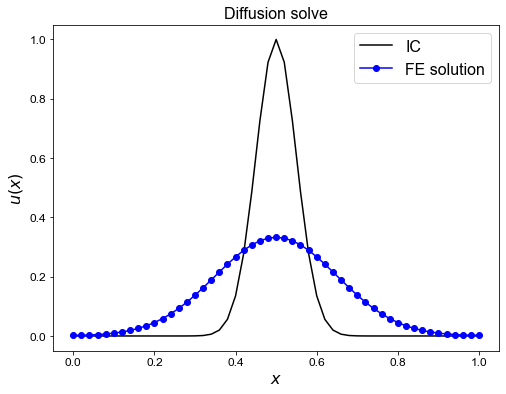

In [47]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Diffusion solve', fontsize=16)

ax1.plot(x_nodes, u_ic, 'k-', label='IC')
ax1.plot(x_nodes, u, 'bo-', label='FE solution')
ax1.legend(loc='best', fontsize=16);

A homework question asks you to consider the difference in solutions obtained with Dirichlet and Neumann conditions.

# Higher dimensions

## Triangular meshes

As we have seen, a natural basis for the function spaces used in the FEM in 1D is obtained by dividing the domain interval into smaller sub-intervals - the elements or cells. The function space is then formed using piecewise constant, linear, quadratic, etc. functions that are either continuous or discontinuous between subsequent elements. To define a piecewise linear function we need values at the two end points of each element, the nodes. For continuous functions each node is shared between two adjacent elements (cf. discontinuous methods).

We can do something very similar in two dimensions: to uniquely determine a linear function within an element, we need its value at *three* points. A natural candidate for the geometric shape of the elements in 2D is therefore the triangle, with the value of each function stored at the three vertices of the triangle. By dividing a two-dimensional domain into a number of triangles, yielding a so-called triangulation, we can then choose our function space to be made up of piecewise linear functions on that triangulation.

Here we start seeing some of the bigger differences between Finite Difference Methods (FDM), which usually require the degrees of freedom to be stored on a rectangular mesh, that is structured in nature - the connections between the nodes form a regular pattern, with connections between the nodes in the previous and subsequent rows and columns. This is unlike unstructured, triangular meshes where there exists no pattern in the connection between the nodes. This is actually one of the big advantages of the FEM: with unstructured, triangular meshes it is a lot easier to accurately describe a complex geometry, and also to smoothly vary the resolution.

<img src="figures/orkney-mesh.jpg" style="width: 800px">

To generate a triangular mesh in a complex geometry we require a piece of software called a mesh generator. Here we will be using [Gmsh](http://gmsh.info/) for anything other than the simplest square domains. To deal with the additional challenges associated with geophysical domains, such as coastlines and bathymetries from different sources and different coordinate systems, we point at [qmesh](http://qmesh.org/), developed at Imperial College (see also [this paper](https://doi.org/10.1016/j.renene.2017.09.058) for more information).

## From a mesh to basis functions

In 1D we could form a basis for the space of piecewise linear continuous functions, from "hat" (or "tent") functions that take the value unity at a single node, and are zero at all others, e.g.:
<img src="figures/hat-function-1d.png" width="400:pix">

In two dimension we do exactly the same. This is what it looks like:

<img src="figures/hat-function-2d.svg" width="400:pix">

<sup>**[source](http://brickisland.net/cs177/?p=309)**</sup>

As you can see the basis function $\phi_i$ is 1 at the node $i$ and linearly decreases to 0 over the adjacent triangles. Anywhere else $\phi_i$ is 0. Just like in 1D, we can write any piecewise linear function as a linear combination of such basis functions:

$$f_h(x) = \sum_{i=0}^N \alpha_i \phi_i(x). $$

It is also possible to allow for higher degree polynomials. For piecewise *quadratic* polynomials, we need the function value at six locations in each triangle. A common choice is to use the same three vertices of the triangle as with p/w linears, as well as three additional nodes located at the middle of each edge.

We can also choose to allow polynomials that are *discontinous* between adjacent triangles. The "hat" basis functions displayed above are continuous, and thus the linear combination of these are continuous as well. By choosing basis functions that are nonzero over a single triangle only, i.e. it takes the value of one at one vertex *inside* the triangle, but jumps to zero immediately outside the triangle, we can form discontinuous functions as well. The choice between continuous and discontinuous basis functions leads to the so-called Continuous Galerkin (CG) and Discontinuous Galerkin (DG) methods

<img src="https://mathstats.uncg.edu/applied/wp-content/uploads/sites/2/2018/01/DG_CG_edit.jpg">

<sup>**[source](https://mathstats.uncg.edu/applied/wp-content/uploads/sites/2/2018/01/DG_CG_edit.jpg)**</sup>

<br>

Finally, we should note that we do not *have to* use triangular meshes for the FEM. Quadrilateral meshes are another possibility where we can for instance choose piecewise *bilinear* basis functions.  In practice we can use any shape element as long as we can represent the appropriate 
basis functions and perform integrals over that shape with ease.  

<br>

This means that we arguably don't have as much flexibility as with the FVM, but remember that FVM is restricted in the complexity with which it represents the solution within a cell.  In some sense one can think of the FVM as a subset of FEM (specifically of discontinuous FEM), in terms of the discretisation one arrives at and the properties of the resulting solution, although not in terms of the the implementation!

## Connectivity in 2D

The following image presents a schematic of an unstructured mesh data structure, or connectivity, in the 2D case and assuming that:


1. our elements are triangular and defined by the locations of three vertices and the edges joining them


2. we have three nodes (degrees of freedom) per element


3. and that these are located at the vertices of the elements 

As stated above, other more complex choices are possible with each of the three above assumptions. For example, we could have quadrilateral elements, with nine nodes per elements, located at the four corners, the four edge midpoints, and with one at the centre of the element.

<img src="figures/connectivity_2d.svg" style="width: 400px">


- Blue are the *element numbers*


- Red are the *local node numbers*


- Black are the *global node numbers*


The connectivity matrix for the case above is

\begin{pmatrix}
    6 & 1 & 3 & 5 & 5 \\
    4 & 4 & 1 & 1 & 6 \\
    1 & 2 & 2 & 3 & 1
\end{pmatrix}

the column being the element, the row the local node number, and the entry of the matrix then being the global node number.

The size of the connectivity matrix is again: 

$$\text{the number of local nodes per element}\;\;\times\;\;\text{the number of elements}
\;\;\;\ = \;\; 3\;\times\;5.$$

## Local assembly, the reference element and implementing FEM in 2D

An advantage of the local assembly approach we described and implemented in the 1D case above is that it generalises straightforwardly to higher dimensions.


- We still loop over the elements and perform integrals over the local element only.


- To do this we use the following reference element.


<img src="figures/reference_elements_2d.svg" style="width: 600px">


- We need quadrature rules over triangles, but these are easy to find.


- We need to define our basis functions over the reference element, but this isn't difficult, especially for the p/w linear option and due to our choice of reference element:

$$\phi_0 = 1 - \xi - \eta, \;\;\;\;\;\; \phi_1 = \xi, \;\;\;\;\;\; \phi_2 = \eta.$$


- We need to consider how derivatives transform, but this just involves the correct use of the Jacobian determinant.


- To implement Dirichlet BCs, we can again use the big spring approach as we did above for simplicity, or we can use the approach we used when we considered BVPs where we removed these degrees of freedom from our discretisation ("lifting").


- For Neumann conditions we need to evaluate surface integrals - in the 2D case this involves performing 1D quadrature over the appropriate boundary edges, and in 3D surface integrals over appropriate faces.


### But should we?

We therefore have all we need to implement a FEM solver in 2 or 3D!  

[could be a coursework exercise - it's not!]

However, it would be a challenge to make this general (in terms of discretisation details and PDE problem we can apply it to) and allow us access to all the sophisticated element choices available to us with the FEM.

Therefore a modern approach is to make use of libraries to do the majority of the work for us. 

As we shall see below, through a high-level approach including the appropriate use of [*domain specific languages*](https://en.wikipedia.org/wiki/Domain-specific_language), we are able to develop highly sophisticated solvers for very complicated problems in only a few lines of Python.  
There are numerous advantages to this sort of approach.

<br>

It is highly advantageous that we know how to code up these things ourselves (as I said earlier in the course I do believe it's the case that you only truly understand a numerical algorithm after you have had a go at implementing (and debugging) it yourself). 

But that does not mean that we should in our "production codes"!!

<div class="optional">
    
# Mesh generation in 2D [$\star$]

First we will consider briefly meshes and mesh generation in higher dimensions. 

Here we will demonstrate some of SciPy's in-built functions. Further below we will make use of an external mesh generation package `Gmsh`.

</div>

points
[[0.  0. ]
 [0.  1.1]
 [0.9 0.1]
 [1.  1. ]
 [0.5 1.5]
 [0.2 0.6]
 [0.6 0.4]
 [0.5 1. ]]
simplices (connectivity)
[[2 6 0]
 [6 2 3]
 [7 6 3]
 [4 7 3]
 [1 7 4]
 [5 7 1]
 [7 5 6]
 [5 1 0]
 [6 5 0]]
neighbours
[[ 8 -1  1]
 [-1  2  0]
 [ 1  3  6]
 [ 2 -1  4]
 [ 3 -1  5]
 [ 4  7  6]
 [ 8  2  5]
 [-1  8  5]
 [ 7  0  6]]
vertex_neighbor_vertices (linked list)
[ 0  4  8 11 15 18 22 27 32]
[2 6 5 1 7 4 5 0 6 0 3 6 2 7 4 7 3 1 7 1 6 0 2 0 3 7 5 6 3 4 1 5]
Point  0  has neigbours  [2 6 5 1]
Point  1  has neigbours  [7 4 5 0]
Point  2  has neigbours  [6 0 3]
Point  3  has neigbours  [6 2 7 4]
Point  4  has neigbours  [7 3 1]
Point  5  has neigbours  [7 1 6 0]
Point  6  has neigbours  [2 0 3 7 5]
Point  7  has neigbours  [6 3 4 1 5]
what element is point in
8


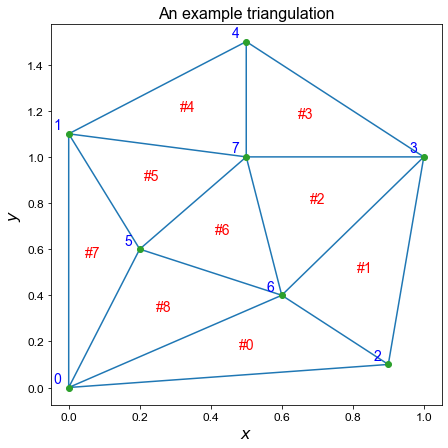

In [11]:
from scipy.spatial import Delaunay

points = np.array([[0, 0], [0, 1.1], [0.9, 0.1], [1, 1], 
                   [0.5,1.5],[0.2,0.6], [0.6,0.4], [0.5,1]])

tri = Delaunay(points, incremental=True)

fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(111)

ax1.triplot(points[:,0], points[:,1], tri.simplices)
ax1.plot(points[:,0], points[:,1], 'o')

for j, p in enumerate(points):
    ax1.text(p[0]-0.02, p[1]+0.02, j, ha='right', color='b', fontsize=14) # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    ax1.text(p[0], p[1], '#%d' % j, ha='center', color='r', fontsize=14) # label triangles
#ax1.set_xlim(-0.5, 1.5)
#ax1.set_ylim(-0.5, 1.5)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('An example triangulation', fontsize=16)

print('points')
print(tri.points)
print('simplices (connectivity)')
print(tri.simplices)
print('neighbours')
print(tri.neighbors)
print('vertex_neighbor_vertices (linked list)')
v0 = tri.vertex_neighbor_vertices[0]
v1 = tri.vertex_neighbor_vertices[1]
print(v0)
print(v1)
for i in range(len(v0)-1):
    print('Point ',i,' has neigbours ',v1[v0[i]:v0[i+1]])
print('what element is point in')
print(tri.find_simplex([.4,.4]))

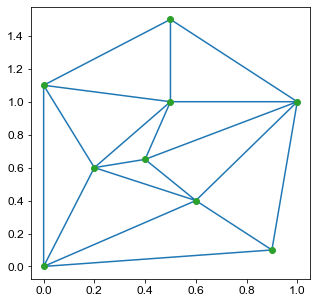

In [12]:
# this is how easily you can add a point in a triangulation
tri.add_points([[0.4,0.65]])
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

ax1.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
ax1.plot(tri.points[:,0], tri.points[:,1], 'o')

<div class="optional">

## Mesh quality and mesh improvement

A homework question asks you to implement a simple scheme to try and improve the quality of meshes such as this.

</div>

<div class="optional">

# Firedrake - solving 2D problems and a gallery of examples  [$\star$]

[Firedrake](https://www.firedrakeproject.org/) is an example of a library that automates the application of the FEM to general PDE problems. As you have seen the extension of the FEM to multiple dimensions involves quite a few steps (mesh generation, numerical integration, complex datastructures, solving linear systems, etc.) that are non-trivial to implement. In particular for large problems with many degrees of freedom, efficient implementations are typically done in large code bases written in lower level languages such as C, C++ or Fortran. The unique feature of Firedrake, along with its cousin project [FEniCS](https://fenicsproject.org/), is that it allows you to specify the actual equations you want to solve (in the weak form!) in a high level mathematical language offered via a Python interface. Firedrake will take care of all the implementation details and automatically derive lower level code that is specifically optimized for the problem you want to solve.

It is developed at Imperial College London and now the basis for many modern applications codes developed at Imperial College and a number of other institutions worldwide. Some applications include ocean modeling ([Thetis](https://thetisproject.org/)), weather forecasting ([Gusto](https://firedrakeproject.org/gusto/)) and ice sheet modelling ([icepack](https://icepack.github.io/)).

</div>

## Installing Firedrake

To use on Ubuntu and Mac see the instructions here: <https://www.firedrakeproject.org/download.html>

Things are more complex on Windows, you can get it going using containers:

`docker run --name -it -p 8888:8888 -v acse3:/home/jovyan stephankramer/jhub-notebook-firedrake`

I used this approach to develop the rest of this notebook, but for potential future project work I wouldn't really recommend this approach. I won't be asking you to do any coursework using Firedrake so for now you can safely ignore running Firedrake yourself and just check out the pre-run cells below.

### Windows tips (partly as a record for myself)


- From PowerShell download and run container

    `docker run --name  acse3 -it -p 8888:8888 -v acse3:/home/jovyan stephankramer/jhub-notebook-firedrake`


- Copy this notebook from the local filesystem into container

    `docker cp .\fem-2.ipynb acse3:/home/jovyan/`


- Copy and paste a URL you got in the shell when running the container into a web browser, e.g.

    `http://127.0.0.1:8888/?token=.......`


- If this doesn't show the Jupter notebook home page and asks for a token, try first stopping any locally running Jupyter notebook


- Click on the notebook


- If it says "not trused" / "read only" then log in to the container and run jupyer trust:

    `docker exec -it acse3 bash`
    
    `jupyter trust fem-2.ipynb`


- Under the Kernel menu option click on "change kernel" and select "Python 3 (firedrake)"



- If you want to copy from container back to local file system

    `docker cp acse3:/home/jovyan/fem-2.ipynb ./`
    
    

In [3]:
import firedrake as fd

ModuleNotFoundError: No module named 'firedrake'

Note that we import firedrake via the shortened name `fd` which means that as usual we need to prepend `fd.` for every symbol that is offered by Firedrake. Since these symbols are used in the mathematical expressions that form the FE equations this can get a little tedious. For this reason the Firedrake documentation recommends using `from firedrake import *` instead. This however means that a lot of standard names will be overwritten by Firedrake. For instance the standard python `sin` function, which can be used on floats only, is replaced by Firedrake's version which can also be used in FE expressions. This is similar to how the `sin` function from NumPy (`np.sin` when using `import numpy as np`) can act on single floats but also on an entire numpy array. Because we are using a number of different libraries in a single notebook here, we will keep the `fd.` prefix for clarity.

## Projection

To start let's check that we can use Firedrake to recreate the $L^2$ projection of a function we wrote our own assembly code to do earlier.

This is the guts of the code without comments (version with comments below!):
``` Python
mesh = fd.IntervalMesh(3, 1.0)
V = fd.FunctionSpace(mesh, "CG", 1)
x = fd.SpatialCoordinate(mesh)
f = fd.sin(2*fd.pi*x[0]) + 0.3*fd.cos(3.*2.*fd.pi*x[0]**2)
u = fd.TrialFunction(V)
v = fd.TestFunction(V)
F = (u - f)*v*fd.dx
a, L = fd.lhs(F), fd.rhs(F)
u = fd.Function(V)
fd.solve(a == L, u)
```

Compare the length of this against the assembly code we wrote above!

`F = (u - f)*v*fd.dx` is the key command here which encodes the problem we are solving: by setting $F=0$ we are stating that we want $u$ to equal $f$ "in a weak sense".

We will see below that we can also achieve the same thing even more concisely using Firedrake functionality as the ability to project a function is in-built:

```Python
mesh = fd.IntervalMesh(3, 1.0)
V = fd.FunctionSpace(mesh, "CG", 1)
x = fd.SpatialCoordinate(mesh)
f = fd.sin(2*fd.pi*x[0]) + 0.3*fd.cos(3.*2.*fd.pi*x[0]**2)
u = fd.Function(V)
u.project(f)
```

We will also see how easily it is to change our element type (function space).

[ 0.743332  0.979498 -1.097326 -0.10659 ]


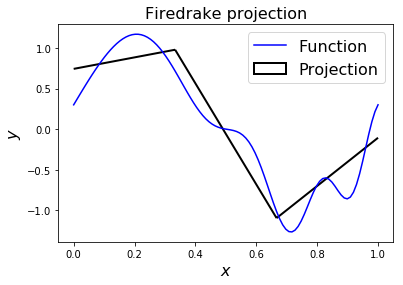

In [6]:
# use an in-built Firedrake function to generate a 1D mesh
mesh = fd.IntervalMesh(3, 1.0)
# define a function space on this mesh - here p/w linear continuous or "P1CG"
V = fd.FunctionSpace(mesh, "CG", 1)
# define the spatial coordinates from the mesh
x = fd.SpatialCoordinate(mesh)

# The function we want to project as a UFL expression
f = fd.sin(2*fd.pi*x[0]) + 0.3*fd.cos(3.*2.*fd.pi*x[0]**2)

# Define test and trial function spaces for use in the weak form definition.
# The same here as we are using a "Galerkin" discretisation
u = fd.TrialFunction(V)
v = fd.TestFunction(V)

# weak or variational form - integrated by parts
F = (u - f)*v*fd.dx  # or F = u*v*fd.dx - f*v*fd.dx
# form the LHS and RHS parts
a, L = fd.lhs(F), fd.rhs(F)

# redefine u to be a solution function
u = fd.Function(V)
# solve a u = L for u given a and L
fd.solve(a == L, u)

# print out the solution values at the nodes
print(u.vector().array())

# plot the Firedrake derived solution against the original function
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Firedrake projection', fontsize=16)
fd.plot(u, axes=ax1)

def f_fun(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)

x_fine = np.linspace(0,1,100)
ax1.plot(x_fine, f_fun(x_fine), 'b-')
ax1.legend(("Function","Projection"), loc="best", fontsize=16);

[ 0.748383  0.966776 -1.06091  -0.301561]


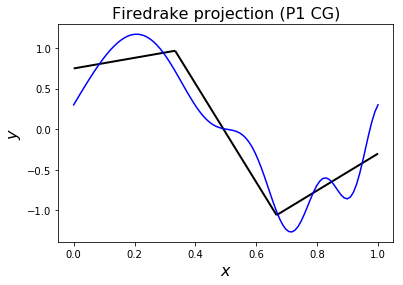

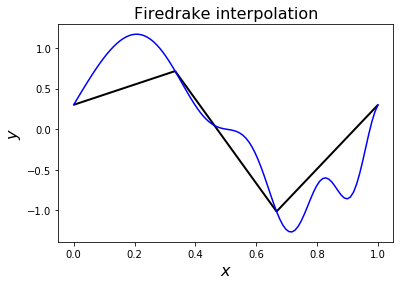

In [7]:
# in this version let's use Firedrake projection, below we also interpolate

# use an in-built Firedrake function to generate a 1D mesh
mesh = fd.IntervalMesh(3, 1.0)
# define a function space on this mesh - here p/w linear continuous or "P1CG"
V = fd.FunctionSpace(mesh, "CG", 1)
# define the spatial coordinates from the mesh
x = fd.SpatialCoordinate(mesh)

# right hand side as a UFL expression
f = fd.sin( 2*fd.pi*x[0]) + 0.3*fd.cos(3.*2.*fd.pi*x[0]**2 )

# use Firedrake projection function
u = fd.Function(V)
# if we do the quadrature of the RHS sufficiently accurately we can get agreement 
# with our code from above where we call simpson's rule with a lot of intervals!
u.project(f, form_compiler_parameters={'quadrature_degree': 16})

# print the nodal values
print(u.vector().array())

# plot the result against the original function
def f_fun(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)
x_fine = np.linspace(0,1,100)
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Firedrake projection (P1 CG)', fontsize=16)
fd.plot(u, axes=ax1)
ax1.plot(x_fine, f_fun(x_fine), 'b-');


# and this is how you would interpolate to the nodes
u = fd.Function(V)
u.interpolate(f)

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Firedrake interpolation', fontsize=16)
fd.plot(u, axes=ax1)
ax1.plot(x_fine, f_fun(x_fine), 'b-');

# result from our own code above:   array([ 0.748383,  0.966776, -1.060909, -0.301561])
# we can get agreement with this with Firedrake as long as we tell it to use high enough quadrature

Let's compare this with the solution we obtained in the previous lecture and above:

<img src="figures/CG_DG_projection.png" style="width: 600px">

Let's see how simple it is to change function space and recreate the discontinuous result, to emphasise the power and convenience of using a library like this:

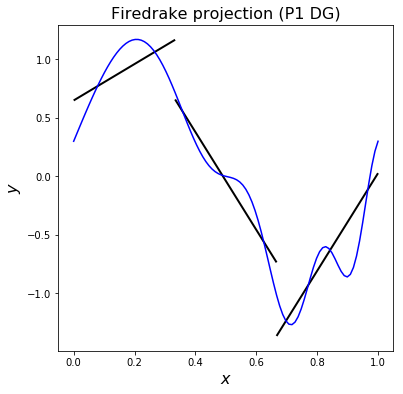

In [8]:
# use a DG space instead 

# use an in-built Firedrake function to generate a 1D mesh
mesh = fd.IntervalMesh(3, 1.0)
# define a function space on this mesh - here p/w linear DIScontinuous or "P1DG"
V = fd.FunctionSpace(mesh, "DG", 1)
# define the spatial coordinates from the mesh
x = fd.SpatialCoordinate(mesh)

u = fd.Function(V)
u.project( fd.sin(2*fd.pi*x[0]) + 0.3*fd.cos(3.*2.*fd.pi*x[0]**2) )

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Firedrake projection (P1 DG)', fontsize=16)
fd.plot(u, axes=ax1)
ax1.plot(x_fine, f_fun(x_fine), 'b-');

## Solving an elliptic problem - the 2D Poisson equation

Now let's consider some actual PDEs.

Let's start with the 2D Poisson problem we considered in a previous lecture where we solved it using a finite difference method.

The continuous problem is

$$ \nabla^2 u = f, $$

on $(x,y)\in [0,1]$ where for our test case 

$$f\equiv 0,$$ 

and the following Dirichlet boundary conditions are applied:

$$u(y,0)=u(y,1)=u(x,0)=0, \;\;\;\; u(x,1) = \sin(2 \pi x),$$

i.e. the solution is inhomogeneous only on one boundary.

The exact solution to this problem is 

$$ u(x,y) = \frac{\sin(2 \pi x)\sinh(2\pi y)}{\sinh(2\pi)}.$$


### Variational form


We look for a function $u\in V$ such that for all $v\in V$ the solution satisfied the weak or variational form of the problem:

$$-\int_{\Omega} \,\nabla^2 u \,v\,dx = \int_{\Gamma} \,f\,v\,dx.$$

Integrating by parts (the higher dimensional form of the rule - see also [Green's first identity](https://en.wikipedia.org/wiki/Green%27s_identities#Green's_first_identity)) we have

$$\int_{\Omega} \,\nabla u \cdot \nabla v  \,dx + \int_{\Gamma}\,v\,\nabla u \cdot \boldsymbol{n} \,dS = \int_{\Gamma} \,f\,v\,dx,$$

where $\boldsymbol{n}$ is the unit outward normal to the domain.

In the numerical implementation of the finite dimensional problem we can assume we have applied the Dirichlet BCs by *restricting the solution space*, i.e. we have moved the contributions due to the boundary degrees of freedom over to the RHS and $v$ is assumed to equal zero on the boundary, hence we simply ignore the boundary term. (Note importantly that this is not the same reasoning for why we ignore the boundary term as a means to enforce homogeneous Neumann BCs!).

So we need to ask Firedrake to discretise and solve the weak form 

$$\int_{\Omega} \,\nabla u \cdot \nabla v  \,dx = \int_{\Gamma} \,f\,v\,dx.$$

We do this with the Firedrake command (using the UFL domain specific language):

```Python
F = fd.dot(fd.grad(u), fd.grad(v))*fd.dx - f*v*fd.dx
```

Note how closely this agrees with the underlying mathematical expression!

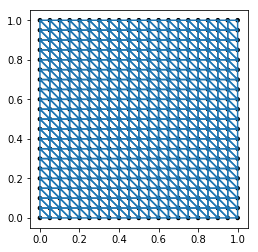

In [9]:
# Start by using an in-built Firedrake function for generating a mesh 
# (as the domain is simple)

# Number of grid points in each direction, including boundary nodes
Nx = 20
Ny = Nx

# Create square mesh of width and length 1 (use `RectangleMesh` if you want other dimensions)
# and divide it into Nx by Ny squares each divided in two triangles
mesh = fd.UnitSquareMesh(Nx, Ny)

# we can ask Firedrake to display the mesh
fd.plot(mesh)

In [10]:
# define a function space consisting of piecewise linear functions
# also known as the P1CG (Continuous Galerkin) function space
V = fd.FunctionSpace(mesh, "CG", 1)

# define the test and trial function spaces
u = fd.TrialFunction(V)
v = fd.TestFunction(V)

# right hand side
f = fd.Function(V)
f.assign( 0 )

# full equation in the weak form with all terms on the lhs, after integration by parts:
F = fd.dot(fd.grad(u), fd.grad(v))*fd.dx - f*v*fd.dx
a, L = fd.lhs(F), fd.rhs(F)

# using UnitSquareMesh (or RectangleMesh), the left, right, bottom and top boundaries 
# are numbered 1, 2, 3, and 4 respectively
x, y = fd.SpatialCoordinate(mesh)
# apply the inhomogeneous Dirichlet BC
bc_top = fd.DirichletBC(V, fd.sin(2*fd.pi*x), 4)
# and the homogeneous Dirichlet BCs
bc_other = fd.DirichletBC(V, 0, (1,2,3))

u = fd.Function(V)
fd.solve(a == L, u, bcs=[bc_top, bc_other])

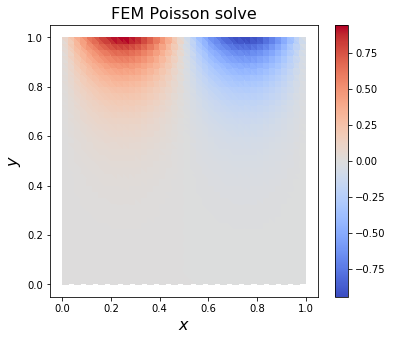

In [11]:
# let's plot our numerical solution 
# (we can compare against the analytical solution as well as that obtained with FDM)
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Poisson solve', fontsize=16)
fd.plot(u,axes=ax1)

## The diffusion equation

Let's solve the 2D form of the diffusion equation problem we considered earlier in the domain $\Omega:=[0,1]^2$.

The strong form of the equation is

$$\frac{\partial u}{\partial t} = \kappa\, \nabla^2 u, $$

and let's assume homogeneous Dirichlet BCs on all boundaries.

For simplicity let's just ignore the $\kappa$ (i.e. pretend it's one).

### Variational form

The variational form in 1D from above was

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + \int_I \,u'\,v'\,dx = 0.$$

Here we've integrated by parts the second derivative and we have ignored the boundary integral due to the imposition of homogeneous Dirichlet BCs.

In 2D this takes the form

$$ \int_{\Omega} \,\frac{\partial u}{\partial t}\,v\,dx + \int_{\Omega} \,\nabla u'\cdot\nabla v'\,dx = 0,$$

which assuming a backward Euler discretisation in time reads

$$ \int_{\Omega} \,\frac{u^{n+1}-u^n}{\Delta t}\,v\,dx + \int_{\Omega} \,\nabla u^{n+1}\cdot\nabla v\,dx = 0.$$

In Firedrake we write (over two lines to make clear where each contribution comes from, but could also write out on a single line)
```Python
# time derivative
F =  ((u - u_old)/dt)*v*fd.dx 
# diffusion term integrated by parts
F += fd.dot(fd.grad(u), fd.grad(v))*fd.dx
```

where `F` contains all terms of the equation, which is now expressed as `F==0`. This is a linear equation that we can solve for $u^{n+1}$. To write it as a standard linear system we need to put all terms that depend on $u^{n+1}$ on the left-hand side, and all others on the right-hand side. In mathematical form the result is:

$$
\int_{\Omega} \,\frac{u^{n+1}}{\Delta t}\,v\,dx + \int_{\Omega} \,\nabla u^{n+1}\cdot\nabla v\,dx = 
\int_{\Omega} \,\frac{u^n}{\Delta t}\,v\,dx
$$

In Firedrake, we can obtain the left-hand side and right-hand side automatically via
```Python
a, L = fd.lhs(F), fd.rhs(F)
```
The equation then takes the form `a==L`.

In [12]:
# Number of grid points in each direction, including boundary nodes
Nx = 20
Ny = Nx

# Firedrake has some internal ability to general simple meshes.
# Create square mesh of width and length 1 (use RectangleMesh if you want other dimensions)
# and divide it into Nx by Ny squares each divided in two triangles
mesh = fd.UnitSquareMesh(Nx, Ny)

# define a function space consisting of piecewise linear functions
# also known as the P1CG (Continuous Galerkin) function space
V = fd.FunctionSpace(mesh, "CG", 1)

# define trial and test functions
u = fd.TrialFunction(V)
v = fd.TestFunction(V)

# Define an initial condition
x, y = fd.SpatialCoordinate(mesh)
# define an initial condition
u_old = fd.interpolate(1.0 * fd.exp( -( (x - 0.5)**2 + (y - 0.5)**2 ) / 0.005), V)

# define function that stores the solution at the new time level
u_new = fd.Function(V)

# using UnitSquareMesh (or RectangleMesh), the left, right, bottom and top boundaries 
# are numbered 1, 2, 3, and 4 respectively
# Set homogeoenous Dirichlet BCs on all boundaries
bcu = fd.DirichletBC(V, 0, (1,2,3,4))

dt = 0.001
# define a Firedrake constant equal to dt so that that variation forms 
# are not regenerated if we change the time step
k = fd.Constant(dt)

# Define weak form:
# time derivative
F =  ((u - u_old)/k)*v*fd.dx 
# diffusion term integrated by parts
F += fd.dot(fd.grad(u), fd.grad(v))*fd.dx

# split into left-hand and right-hand side
a, L = fd.lhs(F), fd.rhs(F)

# Define linear problem
# Use LinearVariationalProblem (and solver) objects to avoid reassembling the
# LHS matrix each step
prob1 = fd.LinearVariationalProblem(a, L, u_new, bcs=bcu)

# Define corresponding solver options (option below corresponds to a direct LU solver)
solver1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'preonly', 'pc_type': 'lu'})

# time stepping parameters
t = 0.
t_end = 0.01

# time step
while t < t_end:
    t += dt
    solver1.solve()
    # copy new solution into u_n for next time step
    u_old.assign(u_new)
    if( np.abs( t - np.round(t,decimals=3) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))  

time = 0.001
time = 0.002
time = 0.003
time = 0.004
time = 0.005
time = 0.006
time = 0.007
time = 0.008
time = 0.009
time = 0.010


**Question:** How could we update the code above to use forward Euler, and why might the simulation go unstable without a smaller time step?

Again we can plot the results using `fd.plot`.

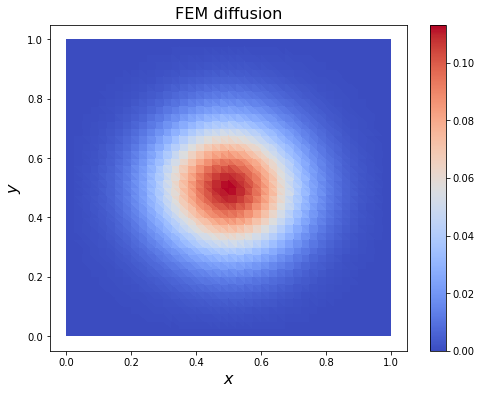

In [13]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM diffusion', fontsize=16)
fd.plot(u_new,axes=ax1)

## The advection equation in two dimensions

This equation describes the advection of a scalar according to a prescribed velocity field $\boldsymbol{u}$. 

Since we are now using $\boldsymbol{u}$ for the velocity field, let's use $q$ for the scalar field that we solve for (the trial function) which we search for in some appropriate function space $V$ (infinite dimensional for the true solution, and finite dimensional for the numerical solution, e.g. the space of all piecewise linear functions)


$$
  \frac{\partial q}{\partial t} + \boldsymbol{u}\cdot \nabla q = 0
$$


In the weak form, we will use $\phi$ for the test function, and ask that


$$
  \int_\Omega \frac{\partial q}{\partial t}\phi \, \mathrm{d}x
    + \int_\Omega \left(\boldsymbol{u}\cdot\nabla q\right)\phi \, \mathrm{d}x = 0, \quad \forall \phi\in V
$$


We integrate by parts


$$
  \int_\Omega \frac{\partial q}{\partial t}\phi \, \mathrm{d}x - L(q, \boldsymbol{u}, \phi) = 0, \\
$$


where


$$L(q, \boldsymbol{u}, \phi) = 
    \int_\Omega q \nabla \cdot\left(\boldsymbol{u}\,\phi\right) \, \mathrm{d}x
  - \int_{\partial\Omega} q\, \boldsymbol{u}\cdot\boldsymbol{n}\, \phi \, \mathrm{d}s = 0,
$$


Again, integration by parts introduces a boundary term, the integral over the boundary $\partial\Omega$, which can be used to impose boundary conditions. In pure advection problems we should only apply a Dirichlet boundary condition $q=q_{\text{in}}$ on the incoming boundaries. If we assume that the normal vector $\boldsymbol{n}$ is always pointing out of the domain, the incoming boundaries are determined by $\boldsymbol{u}\cdot\boldsymbol{n}\lt 0$. At this part of the boundary we replace $q$ with the imposed boundary value $q_{\text{in}}$, and on all other parts we leave $q$ as it is.
Thus the boundary term becomes

$$
  -\int_{\partial\Omega} q_b \, \boldsymbol{u}\cdot\boldsymbol{n}\, \phi \, \mathrm{d}s = 0, \quad
  q_b = \begin{cases}q_{\text{in}} &  \boldsymbol{u}\cdot\boldsymbol{n}\,\lt 0 \\ q & \boldsymbol{u}\cdot\boldsymbol{n}\geq 0\end{cases}
$$

### Runge-Kutta time integration
We will use a slightly more sophisticated, three stage Runge-Kutta time integration scheme here,
in which we solve three equations:

$$
\int_\Omega \Delta q_0 \phi \, \mathrm{d}x = \Delta t~L(q_0, \vec u, \phi), \\
\int_\Omega \Delta q_1 \phi \, \mathrm{d}x = \Delta t~L(q_1, \vec u, \phi), \\
\int_\Omega \Delta q_2 \phi \, \mathrm{d}x = \Delta t~L(q_2, \vec u, \phi),
$$

for respectively $\Delta q_0, \Delta q_1,$ and $\Delta q_2$, in which $q_0 = q^n$ (the solution from the previous time step), $q_1=q_0+\Delta q_0$, and $q_2=\tfrac 34 q_0+\tfrac 14\left(q_1+\Delta q_1\right)$. 

Finally the new solution at the end of the current time step is given by $q^{n+1}=\tfrac 13 q_0 + \tfrac 23\left(q_2+\Delta q_2\right)$.

NB. this choice was motivated by this Firedrake example: <https://www.firedrakeproject.org/demos/DG_advection.py.html>

### Initial condition and velocity field
We will investigate the properties of a Continuous Galerkin (CG) advection scheme advecting a bell shaped initial condition in the usual unit square domain. The velocity field is a simple rotation around the centre of the domain $(0.5, 0.5)$. To the bell-shaped initial condition, which is zero outside the bell, we add the value of one. This means the scalar is one near the boundaries, which we maintain by using a boundary value of $q_{in}=1$ as well.

In [14]:
# the mesh: a unit square divided in 40x40x2 triangles
Nx = 40
Ny = Nx
mesh = fd.UnitSquareMesh(Nx, Ny)

# the function space in which we find the solution:
V = fd.FunctionSpace(mesh, "CG", 1)
# the function space used for the velocity field:
W = fd.VectorFunctionSpace(mesh, "CG", 1)

# the velocity field is a simple counter clockwise rotation around (0.5, 0.5)
x, y = fd.SpatialCoordinate(mesh)
velocity = fd.as_vector((0.5 - y, x - 0.5))
u = fd.Function(W).interpolate(velocity)

# the initial condition for the scalar function
bell_r0 = 0.15; bell_x0 = 0.25; bell_y0 = 0.5
bell = 0.25*(1+fd.cos(fd.pi*fd.min_value(fd.sqrt(pow(x-bell_x0, 2) + pow(y-bell_y0, 2))/bell_r0, 1.0)))

q = fd.Function(V).interpolate(1.0 + bell)
q_init = fd.Function(V).assign(q)

# We will run for time `2\pi`, a full rotation.  We take 600 steps, giving
# a timestep close to the CFL limit.  We declare an extra variable ``dtc``; for
# technical reasons, this means that Firedrake does not have to compile new C code
# if the user tries different timesteps.  Finally, we define the inflow boundary
# condition, q = q_in.
T = 2*fd.pi
dt = T/600.0
dtc = fd.Constant(dt)
q_in = fd.Constant(1.0)

Let's plot these:

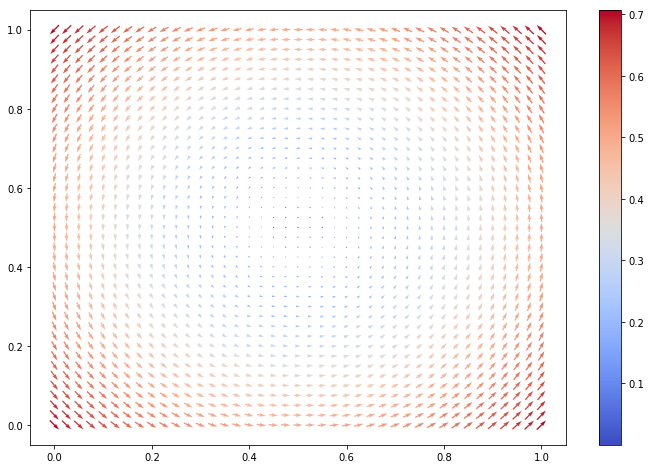

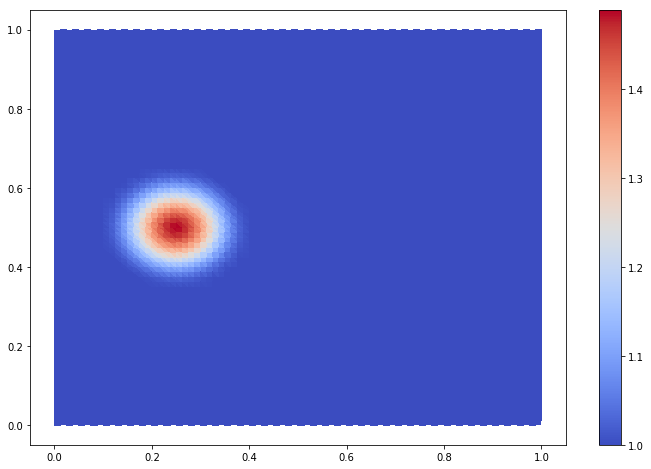

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
fd.plot(u, axes=ax);
fig, ax = plt.subplots(figsize=(12,8))
fd.plot(q_init, axes=ax);

0.002634824649959733


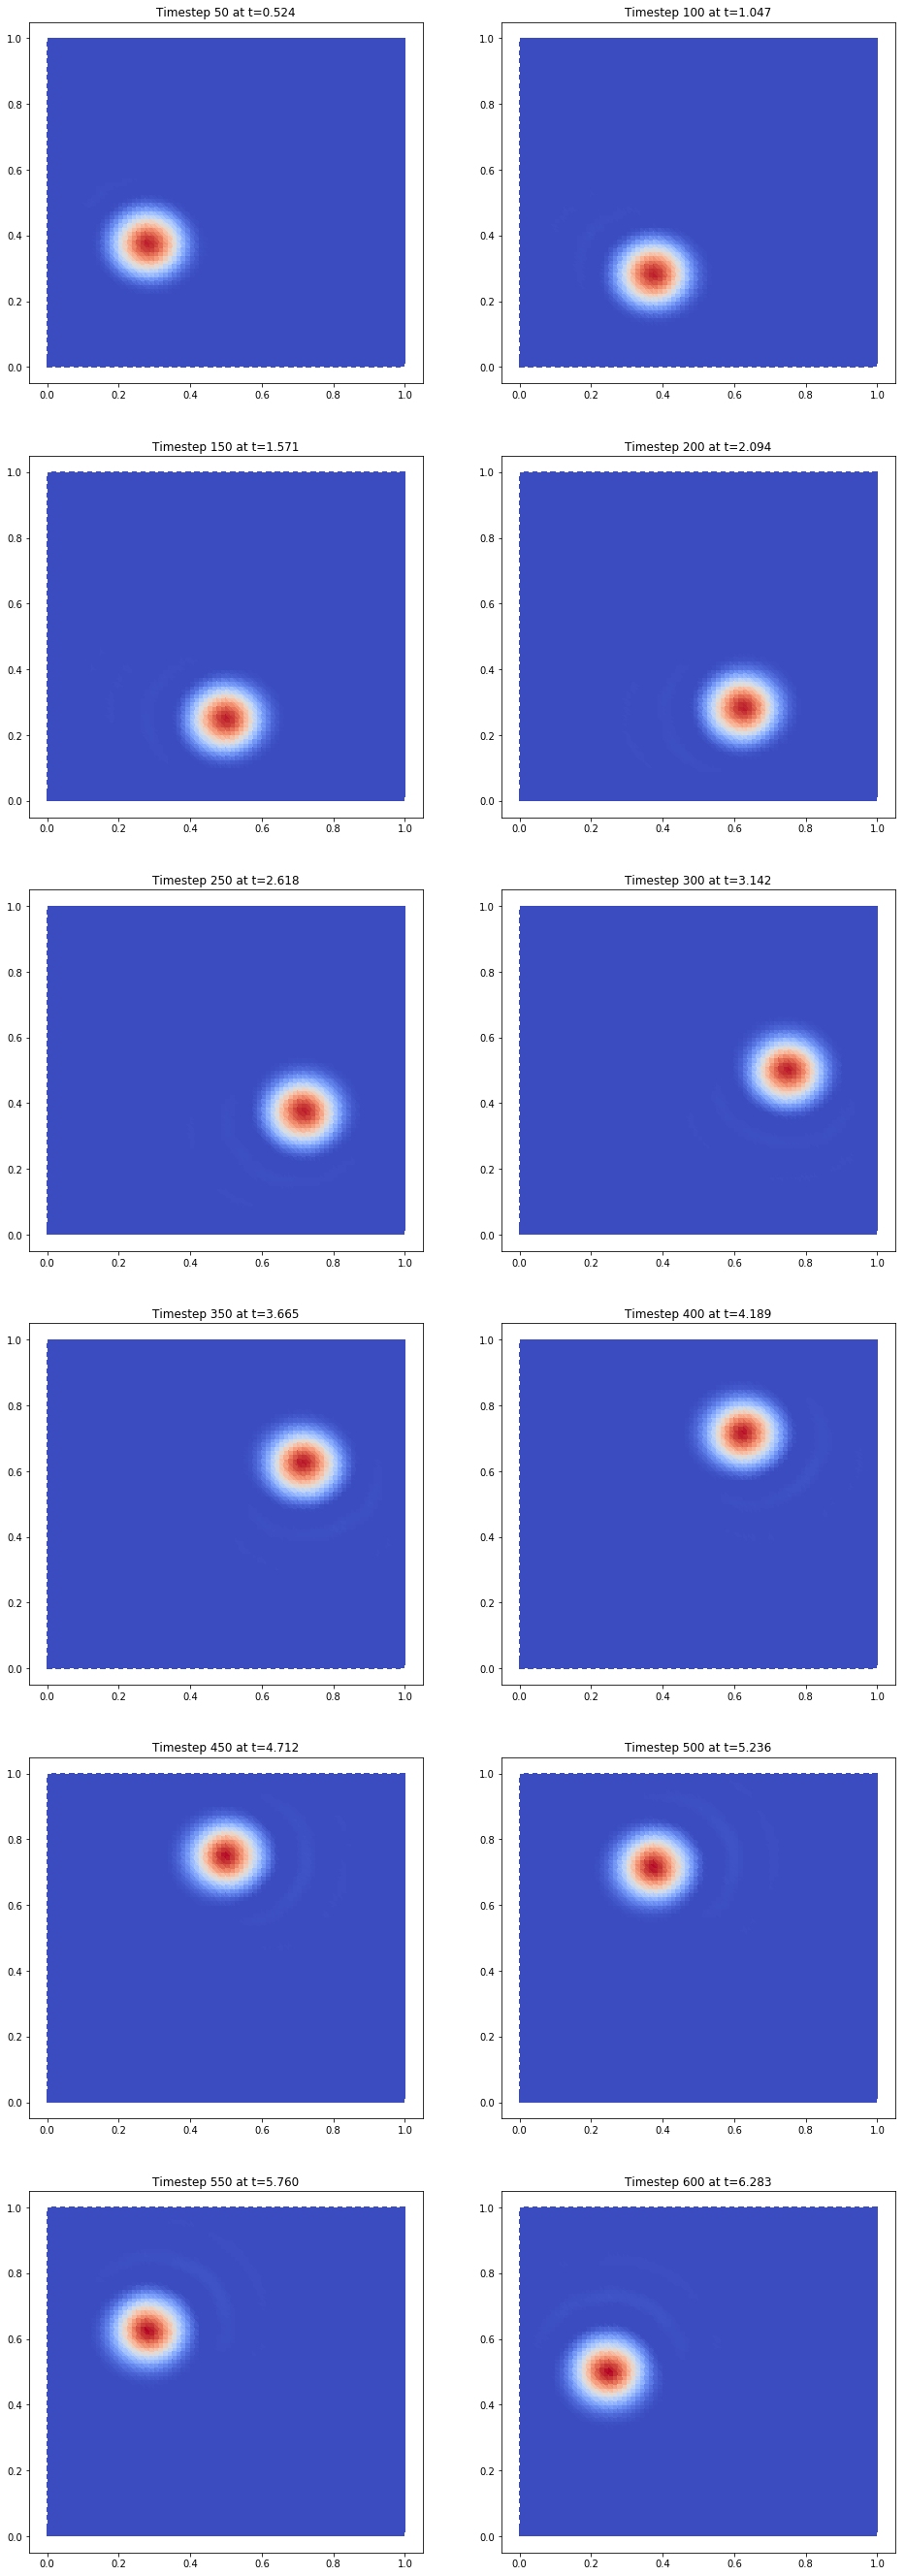

In [16]:
# Now we declare our variational forms.  Solving for dq (\Delta q) at each
# stage, the explicit timestepping scheme means that the left-hand side is just a
# mass matrix.

dq_trial = fd.TrialFunction(V)
phi = fd.TestFunction(V)
a = phi*dq_trial*fd.dx

# The right-hand-side is more interesting.

# FacetNormal gives us the normal to the boundary edges, which we call n as usual
n = fd.FacetNormal(mesh)

# the RHS for the first Runge Kutta stage, using q from the previous timestep
L1 = dtc*(q*fd.div(phi*u)*fd.dx
          - fd.conditional(fd.dot(u, n) < 0, phi*fd.dot(u, n)*q_in, 0.0)*fd.ds
          - fd.conditional(fd.dot(u, n) > 0, phi*fd.dot(u, n)*q, 0.0)*fd.ds)

# as can be seen from the formulae above the RHS for stages 2 and 3
# can be obtained by simply replacing q with q1 and q2 resp.
q1 = fd.Function(V); q2 = fd.Function(V)
L2 = fd.replace(L1, {q: q1}); L3 = fd.replace(L1, {q: q2})

# We now declare a variable to hold the temporary increments at each stage.
dq = fd.Function(V)

# Since we want to perform hundreds of timesteps, ideally we should avoid
# reassembling the left-hand-side mass matrix each step, as this does not change.
# We therefore make use of the ``LinearVariationalProblem`` and
# ``LinearVariationalSolver`` objects for each of our Runge-Kutta stages. These
# cache and reuse the assembled left-hand-side matrix. 

prob1 = fd.LinearVariationalProblem(a, L1, dq)
solv1 = fd.LinearVariationalSolver(prob1)
prob2 = fd.LinearVariationalProblem(a, L2, dq)
solv2 = fd.LinearVariationalSolver(prob2)
prob3 = fd.LinearVariationalProblem(a, L3, dq)
solv3 = fd.LinearVariationalSolver(prob3)

# we plot the solution every other `nsteps` timesteps
nsteps = 50

# estimate the number of rows of figures we need
nrows = int(np.ceil(T/dt/nsteps/2))
fig, axes  = plt.subplots(nrows, 2, figsize=(16, 8*nrows))
axes = axes.flatten()

t = 0.0
step = 0
while t < T - 0.5*dt:
    solv1.solve()
    q1.assign(q + dq)

    solv2.solve()
    q2.assign(0.75*q + 0.25*(q1 + dq))

    solv3.solve()
    q.assign((1.0/3.0)*q + (2.0/3.0)*(q2 + dq))

    step += 1
    t += dt

    if step % nsteps == 0:
        ax = axes[step//nsteps-1]
        fd.plot(q, axes=ax, cmap=None)
        # set the colormap:
        cbar = ax.collections[-1].set_clim(1, 1.5)
        cbar = ax.collections[-1].set_cmap(cm.coolwarm)
        ax.title.set_text('Timestep %d at t=%.3f' % (step, t))


# Finally, we display the normalised :math:`L^2` error, by comparing to the
# initial condition. ::

L2_err = fd.sqrt(fd.assemble((q - q_init)*(q - q_init)*fd.dx))
L2_init = fd.sqrt(fd.assemble(q_init*q_init*fd.dx))
print(L2_err/L2_init)

<div class="advanced">

# Incompressible Navier-Stokes (CFD) examples using Firedrake [$\star\star$]

For details of the form of the Navier-Stokes equations considered here and the discretisation (IPCS) employed here see chapter 21 ("A comparison of finite element schemes for the incompressible Navier–Stokes equations") of the [FEniCS book](https://launchpadlibrarian.net/83776282/fenics-book-2011-10-27-final.pdf).

**Aside: FEniCS**

[FEniCS](https://fenicsproject.org/) is a project very similar in nature to Firedrake (i.e. the automated solution of PDEs via the FEM) and much of the syntax (namely the Python API; the DSL for specifying the weak form of PDEs is called [UFL](https://fenics.readthedocs.io/projects/ufl/en/latest/) - a component of FEniCS) is common so you can learn a lot about Firedrake from FEniCS.

IPCS is a variant of the Chorin projection based method we introduced in lecture 9 which involves first solving for a guess at velocity which isn't necessarily divergence-free; we then solve a pressure Possion type equation which gives us the new pressure field as well as an update for velocity which enforces the divergence-free constraint.

</div>

<div class="advanced">

The incompressible Navier Stokes equations are given by a momentum equation:

$$
  \newcommand{\tsigma}{\bar{\bar\sigma}}
  \frac{\partial\boldsymbol{u}}{\partial t} + \boldsymbol{u}\cdot\nabla \boldsymbol{u} - \nabla\cdot\tsigma(\boldsymbol{u}, p) = f,
  \tag{NS1} \label{NS1}
$$

coupled to the incompressibility condition:

$$
  \nabla\cdot\boldsymbol{u} = 0, \tag{NS2} \label{NS2}
$$

where $\tsigma(\boldsymbol{u}, p)$ is the stress tensor given by

$$
  \tsigma(\boldsymbol{u}, p) = \nu\left[\nabla\boldsymbol{u} + \left(\nabla \boldsymbol{u}\right)^T\right] - p~{\mathbf I}
$$

with kinematic viscosity $\nu$. Equations $\eqref{NS1}$ and $\eqref{NS2}$ are solved for velocity $\boldsymbol{u}\,$ and pressure $p$ but note that we do not have an independent equation associated with $p$.

There are various approaches to solving these coupled equations, many based on the idea of a pressure projection or  correction which we say in L10. Here, we follow the s-called IPCS method, which involves three steps:

1. Solve for an intermediate velocity $\boldsymbol{u}^*$ using the pressure from the previous time step $p^n$:

$$
\frac{\boldsymbol{u}^* - \boldsymbol{u}^n}{\Delta t} + \boldsymbol{u}^n\cdot\nabla \boldsymbol{u}^n - \nabla\cdot\tsigma\left(\frac{\boldsymbol{u}^* + \boldsymbol{u}^n}2, p^n\right) = f
$$

2. Solve for the new pressure $p^{n+1}$ using a pressure Poisson equation:

$$
  \nabla^2 p^{n+1} = \nabla^2 p^n + \frac 1{\Delta t}\nabla\cdot\boldsymbol{u}^*
$$

3. Apply a correction to $\boldsymbol{u}^*$ to obtain the new velocity $\boldsymbol{u}^{n+1}$

$$
  \boldsymbol{u}^{n+1} = \boldsymbol{u}^* - \frac{p^{n+1}-p^n}{\Delta t}
$$

For the FEM, the above three equation need to be reformulated into weak form with careful consideration of the boundary terms.  For more details see the the [FEniCS book](https://launchpadlibrarian.net/83776282/fenics-book-2011-10-27-final.pdf).  

</div>

## Pressure driven channel

In this problem we look at the flow in a channel section driven by a pressure difference between the two open ends of the channel. The side boundaries are assigned a no-slip boundary condition. We expect a quadratic velocity profile across the channel.

In [17]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(1)

# time step
dt = 0.05
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

# mesh
Nx = 10
Ny = Nx
mesh = fd.UnitSquareMesh(Nx, Ny)

# function spaces
V = fd.VectorFunctionSpace(mesh, "CG", 2)
Q = fd.FunctionSpace(mesh, "CG", 1)

# define trial and test functions
u = fd.TrialFunction(V)
v = fd.TestFunction(V)

p = fd.TrialFunction(Q)
q = fd.TestFunction(Q)

u_now = fd.Function(V)
u_next = fd.Function(V)
u_star = fd.Function(V)
p_now = fd.Function(Q)
p_next = fd.Function(Q)

# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_now + u)

def sigma(u, p):
    """Stress tensor"""
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))

# Define boundary conditions
# pressure BCs 
bcu = fd.DirichletBC(V, fd.Constant((0.0, 0.0)), (3, 4))  # no slip on walls
bcp = [fd.DirichletBC(Q, fd.Constant(8.0), 1),  # inflow pressure of 8
       fd.DirichletBC(Q, fd.Constant(0.0), 2)]  # outflow pressure of 0

# Define variational forms 
# The Navier-Stokes momentum equation ...
# time derivative
F1 = fd.inner((u - u_now)/k, v) * fd.dx \
# advection (fully explicit)
F1 += fd.inner(fd.dot(u_now, fd.nabla_grad(u_now)), v) * fd.dx \
# stress (Crank-Nicolson for viscosity, explicit for pressure)
F1 += fd.inner(sigma(u_mid, p_now), fd.sym(fd.nabla_grad(v))) * fd.dx \
# pressure boundary term
F1 += fd.inner(p_now * n, v) * fd.ds \
# diffusion boundary term
F1 -= fd.inner(nu * fd.dot(fd.nabla_grad(u_mid), n), v) * fd.ds \
# source term
F1 -= fd.inner(f, v) * fd.dx

a1, L1 = fd.system(F1)

# variational form corresponding to the pressure Poisson equation
a2 = fd.inner(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx
L2 = fd.inner(fd.nabla_grad(p_now), fd.nabla_grad(q)) * fd.dx \
    - (1/k) * fd.inner(fd.div(u_star), q) * fd.dx

# variational form corresponding to the velocity update
a3 = fd.inner(u, v) * fd.dx
L3 = fd.inner(u_star, v) * fd.dx \
     - k * fd.inner(fd.nabla_grad(p_next - p_now), v) * fd.dx

# Define linear problems
prob1 = fd.LinearVariationalProblem(a1, L1, u_star, bcs=bcu)
prob2 = fd.LinearVariationalProblem(a2, L2, p_next, bcs=bcp)
prob3 = fd.LinearVariationalProblem(a3, L3, u_next)

# Define solvers. ksp_type is a Petsc keyword to define the solver, pc_type the preconditioner
solver1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'}) 
solver2 = fd.LinearVariationalSolver(prob2, solver_parameters={'ksp_type': 'cg', 'pc_type': 'gamg'}) 
solver3 = fd.LinearVariationalSolver(prob3, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'}) 

# Prep for saving solutions
u_save = fd.Function(V).assign(u_now)
p_save = fd.Function(Q).assign(p_now)
outfile_u = fd.File("outputs/channel/u.pvd")
outfile_p = fd.File("outputs/channel/p.pvd")
outfile_u.write(u_save)
outfile_p.write(p_save)

# Time loop
t = 0.0
t_end = 10.0

print("Beginning time loop...")

#for steps in range(num_steps):
while t < t_end:
    solver1.solve()
    solver2.solve()
    solver3.solve()

    t += dt

    u_save.assign(u_next)
    p_save.assign(p_next)
    outfile_u.write(u_save)
    outfile_p.write(p_save)

    # update solutions
    u_now.assign(u_next)
    p_now.assign(p_next)
    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

Setting up solver.
Beginning time loop...
time = 1.000
time = 2.000
time = 3.000
time = 4.000
time = 5.000
time = 6.000
time = 7.000
time = 8.000
time = 9.000
time = 10.000
Simulation complete


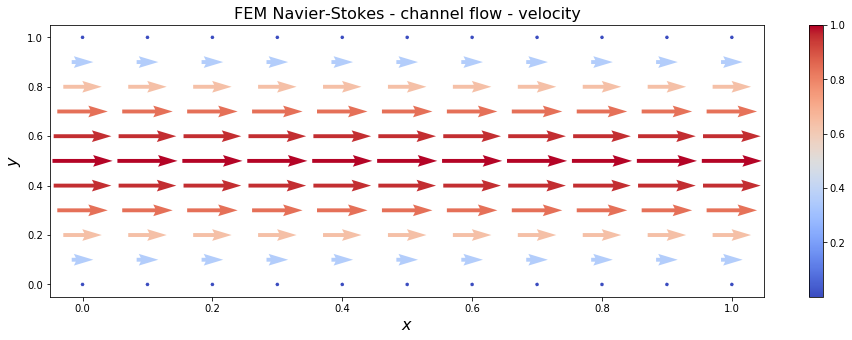

In [18]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - channel flow - velocity', fontsize=16)
fd.plot(u_now,axes=ax1)

RMS error =  2.8451876066393064e-05


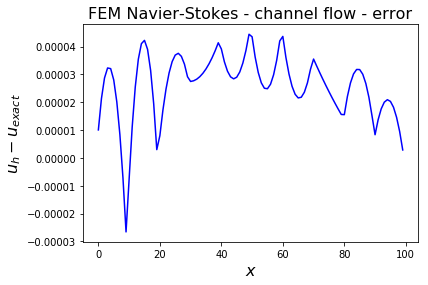

In [19]:
# compute and plot an error based on exact solution being a quadratic
N = 100
locs = np.zeros((N,2))
locs[:,0] = 0.5*np.ones(N)
locs[:,1] = np.linspace(0.01,0.99,N)

# .at is how we can evaluate the FE solution at given locations in Firedrake
ux_locs = u_now.at(locs)
# pull out the x component of the velocity
ux = [ux_loc[0] for ux_loc in ux_locs]

y = locs[:,1]
# the exact solution - a quadratic across the channel
ux_exact = 4*y*(1-y)
error = np.linalg.norm(ux - ux_exact) / np.sqrt(len(ux))
print('RMS error = ',error)
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u_h - u_{exact}$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - channel flow - error', fontsize=16)
ax1.plot(ux - ux_exact, 'b-');

## Lid driven cavity

Let's recreate the $Re=100$ lid driven cavity we solved using the FDM in lecture 9.

In [20]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(0.01)

# time step
dt = 0.01
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

# Number of grid points in each direction, including boundary nodes
Nx = 100
Ny = Nx

# Firedrake has some internal ability to general simple meshes.
# Create square mesh of width and length 1 (use RectangleMesh if you want other dimensions)
# and divide it into Nx by Ny squares each divided in two triangles
mesh = fd.UnitSquareMesh(Nx, Ny)

V = fd.VectorFunctionSpace(mesh, "CG", 2)
Q = fd.FunctionSpace(mesh, "CG", 1)

u = fd.TrialFunction(V)
v = fd.TestFunction(V)

p = fd.TrialFunction(Q)
q = fd.TestFunction(Q)

u_now = fd.Function(V)
u_next = fd.Function(V)
u_star = fd.Function(V)
p_now = fd.Function(Q)
p_next = fd.Function(Q)

# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_now + u)

def sigma(u, p):
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))

# Define boundary conditions
bcu = [fd.DirichletBC(V, fd.Constant((0.0, 0.0)), (1, 2, 3)), # bottom, left and right
          fd.DirichletBC(V, fd.Constant((1.0, 0.0)), 4)] # top

# Define variational forms - see the comments above
F1 = fd.inner((u - u_now)/k, v) * fd.dx \
    + fd.inner(fd.dot(u_now, fd.nabla_grad(u_mid)), v) * fd.dx \
    + fd.inner(sigma(u_mid, p_now), fd.sym(fd.nabla_grad(v))) * fd.dx \
    + fd.inner(p_now * n, v) * fd.ds \
    - fd.inner(nu * fd.dot(fd.nabla_grad(u_mid), n), v) * fd.ds \
    - fd.inner(f, v) * fd.dx

a1, L1 = fd.system(F1)

a2 = fd.inner(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx
L2 = fd.inner(fd.nabla_grad(p_now), fd.nabla_grad(q)) * fd.dx \
    - (1/k) * fd.inner(fd.div(u_star), q) * fd.dx

a3 = fd.inner(u, v) * fd.dx
L3 = fd.inner(u_star, v) * fd.dx \
     - k * fd.inner(fd.nabla_grad(p_next - p_now), v) * fd.dx

# Define linear problems
prob1 = fd.LinearVariationalProblem(a1, L1, u_star, bcs=bcu)
prob2 = fd.LinearVariationalProblem(a2, L2, p_next)
prob3 = fd.LinearVariationalProblem(a3, L3, u_next, bcs=bcu)

# Define solvers
solve1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'})
# deal with the nullspace in the pressure solve (due to Neumann BCs on all boundaries)
nullspace = fd.VectorSpaceBasis(constant=True)
solve2 = fd.LinearVariationalSolver(prob2, nullspace=nullspace, transpose_nullspace=nullspace, 
                                    solver_parameters={'ksp_type': 'cg', 'pc_type': 'hypre'})
solve3 = fd.LinearVariationalSolver(prob3, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'})

# Prep for saving solutions
u_save = fd.Function(V).assign(u_now)
p_save = fd.Function(Q).assign(p_now)
outfile_u = fd.File("outputs/LDC/u.pvd")
outfile_p = fd.File("outputs/LDC/p.pvd")
outfile_u.write(u_save)
outfile_p.write(p_save)

# Time loop
t = 0.0
t_end = 20

print("Beginning time loop...")

while t < t_end:
    solve1.solve()
    solve2.solve()
    solve3.solve()

    t += dt

    u_save.assign(u_next)
    p_save.assign(p_next)
    outfile_u.write(u_save)
    outfile_p.write(p_save)

    # update solutions
    u_now.assign(u_next)
    p_now.assign(p_next)
    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

Setting up solver.
Beginning time loop...
time = 1.000
time = 2.000
time = 3.000
time = 4.000
time = 5.000
time = 6.000
time = 7.000
time = 8.000
time = 9.000
time = 10.000
time = 11.000
time = 12.000
time = 13.000
time = 14.000
time = 15.000
time = 16.000
time = 17.000
time = 18.000
time = 19.000
time = 20.000
Simulation complete


(-0.05, 1.05, -0.05, 1.05)

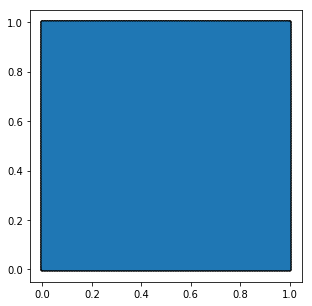

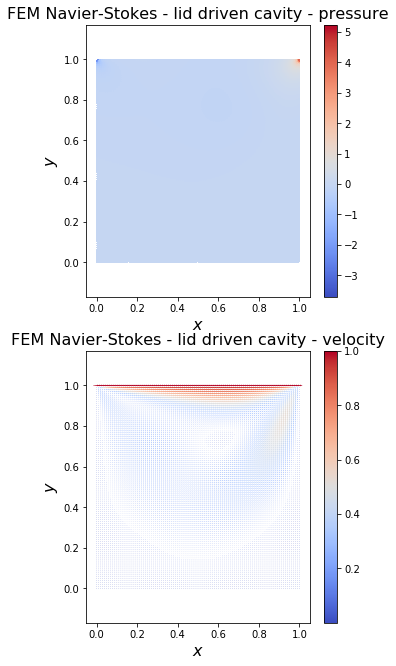

In [21]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
fd.plot(mesh, axes=ax1)

fig = plt.figure(figsize=(5, 11))
fig.tight_layout(w_pad=6, h_pad=6)
ax1 = fig.add_subplot(211)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - lid driven cavity - pressure', fontsize=16)
fd.plot(p_now,axes=ax1)
ax1.axis('equal')
ax1 = fig.add_subplot(212)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - lid driven cavity - velocity', fontsize=16)
fd.plot(u_now,axes=ax1)
ax1.axis('equal')

and compare the computed solution against the same data we used to compate the FDM.

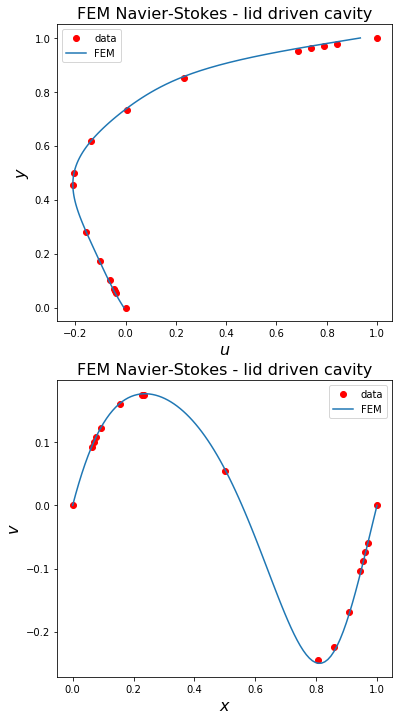

In [22]:
# benchmark data from
# Ghia, U., Ghia, K. N. & Shin, C. T. 
# High-Re solutions for incompressible flow 
# using the Navier-Stokes equations and a multigrid method. 
# J. Comput. Phys. 48, 387–411 (1982).

Ghia_Re100_u = np.array([[1.0, 1.0],
                         [0.9766, 0.84123],
                         [0.9688, 0.78871],
                         [0.9609, 0.73722],
                         [0.9531, 0.68717],
                         [0.8516, 0.23151],
                         [0.7344, 0.00332],
                         [0.6172, -0.13641],
                         [0.5000, -0.20581],
                         [0.4531, -0.21090],
                         [0.2813, -0.15662],
                         [0.1719, -0.10150],
                         [0.1016, -0.06434],
                         [0.0703, -0.04775],
                         [0.0625, -0.04192],
                         [0.0547, -0.03717],
                         [0.0000, 0.000000]])

Ghia_Re100_v = np.array([[1.0, 0.0],
                         [0.9688, -0.05906],
                         [0.9609, -0.07391],
                         [0.9531, -0.08864],
                         [0.9453, -0.10313],
                         [0.9063, -0.16914],
                         [0.8594, -0.22445],
                         [0.8047, -0.24533],
                         [0.5000, 0.05454],
                         [0.2344, 0.17527],
                         [0.2266, 0.17507],
                         [0.1563, 0.16077],
                         [0.0938, 0.12317],
                         [0.0781, 0.10890],
                         [0.0703, 0.10091],
                         [0.0625, 0.09233],
                         [0.0000, 0.00000]])

N = 100
fig = plt.figure(figsize=(6, 12))
fig.tight_layout(w_pad=6, h_pad=6)
ax1 = fig.add_subplot(211)
ax1.set_xlabel('$u$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - lid driven cavity', fontsize=16)
ax1.plot(Ghia_Re100_u[:,1],Ghia_Re100_u[:,0],'ro',label='data')

locs1 = np.zeros((N,2))
locs1[:,0] = 0.5*np.ones(N)
locs1[:,1] = np.linspace(1.e-6,1-1.e-6,N)
ux = [u_now.at(locs)[i][0] for i in range(N)]
ax1.plot(ux, locs1[:,1], label='FEM')
ax1.legend(loc="best")

ax1 = fig.add_subplot(212)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$v$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - lid driven cavity', fontsize=16)
ax1.plot(Ghia_Re100_v[:,0],Ghia_Re100_v[:,1],'ro',label='data')

locs2 = np.zeros((N,2))
locs2[:,0] = np.linspace(1.e-6,1-1.e-6,N)
locs2[:,1] = 0.5*np.ones(N)
uy = [u_now.at(locs2)[i][1] for i in range(N)]
ax1.plot(locs2[:,0], uy, label='FEM')
ax1.legend(loc="best")

## Flow past a cylinder

Flow past a cylinder is a very classical CFD test problem.

The geometry is a circle cut out of a rectangle. This is sufficiently complex that we need to make use of a dedicated piece of mesh generation software, e.g. [*Gmsh*](http://gmsh.info/) is good and free!

### Geometry description and mesh generation

The following is a `Gmsh` input file ("cylinder.geo") which can be run with the command `gmsh -2 cylinder.geo`.


```
// far field resolution
dx1 = 0.05;
// resolution at cylinder
dx2 = 0.01;

// 4 corners of rectangle
Point(1) = {0, 0, 0, dx1};
Point(2) = {2.2, 0, 0, dx1};
Point(3) = {0, 0.41, 0, dx1};
Point(4) = {2.2, 0.41, 0, dx1};
// define circle, centre then two points either side
Point(5) = {0.15, 0.2, -0, dx2};
Point(6) = {0.25, 0.2, -0, dx2};
Point(7) = {0.2, 0.2, 0, dx1};

// define the rectange
Line(1) = {3, 4};
Line(2) = {4, 2};
Line(3) = {2, 1};
Line(4) = {1, 3};

// define the circle
Circle(5) = {5, 7, 6};
Circle(6) = {6, 7, 5};

Line Loop(9) = {1, 2, 3, 4, -5, -6};
Plane Surface(9) = {9};

//top(1) and bottom(3)
Physical Line(1) = {1, 3};
// inflow  
Physical Line(2) = {4};
//outflow
Physical Line(3) = {2};
//circle
Physical Line(4) = {5, 6};

// Whole domain id
Physical Surface(9) = {9};
```

NB. the numbers 1, 2, 3, and 4 are the labels we use to specify BCs (not the same as the Firedrake defauly 1-4 we used earlier). 

It's important we use the correct numbers in the Firedrake code otherwise we could be applying the inflow BC on the wrong boundary - it's good practice to document your meshing files.

<br>

To run gmsh, and to get an output in a format constent with the version of the libraries in the provided container (which is a little old now) run
  
    `gmsh -2 cylinder.geo -format msh2`

on a system with gmsh installed. Here you can just grab the .msh files from the ACSE-3 github repo in the gmsh directory.

In [27]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(0.001)

# time step
dt = 0.001
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

# instead of using RectangleMesh, we now read the mesh from file
mesh = fd.Mesh("cylinder.msh")

V = fd.VectorFunctionSpace(mesh, "CG", 2)
Q = fd.FunctionSpace(mesh, "CG", 1)

u = fd.TrialFunction(V)
v = fd.TestFunction(V)

p = fd.TrialFunction(Q)
q = fd.TestFunction(Q)

u_now = fd.Function(V)
u_next = fd.Function(V)
u_star = fd.Function(V)
p_now = fd.Function(Q)
p_next = fd.Function(Q)

# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_now + u)

def sigma(u, p):
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))


x, y = fd.SpatialCoordinate(mesh)

# Define boundary conditions
bcu = [fd.DirichletBC(V, fd.Constant((0,0)), (1, 4)), # top-bottom and cylinder
          fd.DirichletBC(V, ((4.0*1.5*y*(0.41 - y) / 0.41**2) ,0), 2)] # inflow
bcp = [fd.DirichletBC(Q, fd.Constant(0), 3)]  # outflow

# Define variational forms
F1 = fd.inner((u - u_now)/k, v) * fd.dx \
    + fd.inner(fd.dot(u_now, fd.nabla_grad(u_mid)), v) * fd.dx \
    + fd.inner(sigma(u_mid, p_now), fd.sym(fd.nabla_grad(v))) * fd.dx \
    + fd.inner(p_now * n, v) * fd.ds \
    - fd.inner(nu * fd.dot(fd.nabla_grad(u_mid), n), v) * fd.ds \
    - fd.inner(f, v) * fd.dx

a1, L1 = fd.system(F1)

a2 = fd.inner(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx
L2 = fd.inner(fd.nabla_grad(p_now), fd.nabla_grad(q)) * fd.dx \
    - (1/k) * fd.inner(fd.div(u_star), q) * fd.dx

a3 = fd.inner(u, v) * fd.dx
L3 = fd.inner(u_star, v) * fd.dx \
     - k * fd.inner(fd.nabla_grad(p_next - p_now), v) * fd.dx

# Define linear problems
prob1 = fd.LinearVariationalProblem(a1, L1, u_star, bcs=bcu)
prob2 = fd.LinearVariationalProblem(a2, L2, p_next, bcs=bcp)
prob3 = fd.LinearVariationalProblem(a3, L3, u_next)

# Define solvers
solve1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'})  
solve2 = fd.LinearVariationalSolver(prob2, solver_parameters={'ksp_type': 'cg', 'pc_type': 'gamg'})  
solve3 = fd.LinearVariationalSolver(prob3, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'})  

# Prep for saving solutions
u_save = fd.Function(V).assign(u_now)
p_save = fd.Function(Q).assign(p_now)
outfile_u = fd.File("outputs/cylinder/u.pvd")
outfile_p = fd.File("outputs/cylinder/p.pvd")
outfile_u.write(u_save)
outfile_p.write(p_save)

# Time loop
t = 0.0
t_end = 5.

print("Beginning time loop...")

u_list = []
while t < t_end :
    solve1.solve()
    solve2.solve()
    solve3.solve()

    t += dt

    u_save.assign(u_next)
    p_save.assign(p_next)
    outfile_u.write(u_save)
    outfile_p.write(p_save)
    
    u_list.append(fd.Function(u_next))

    # update solutions
    u_now.assign(u_next)
    p_now.assign(p_next)

    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

Setting up solver.
Beginning time loop...
time = 1.000
time = 2.000
time = 3.000
time = 4.000
time = 5.000
Simulation complete


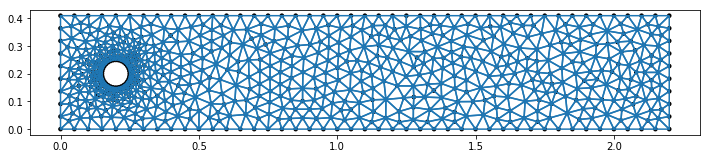

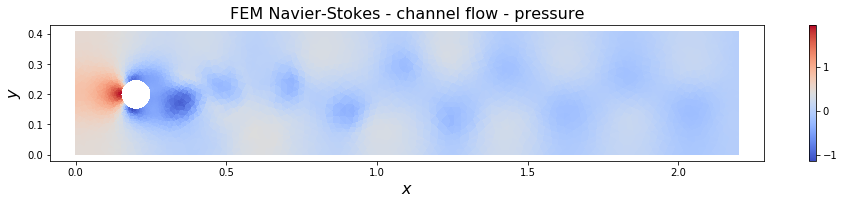

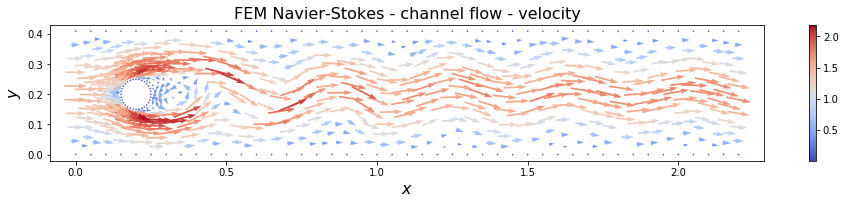

In [28]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
fd.plot(mesh, axes=ax1)

fig = plt.figure(figsize=(16, 2.5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - channel flow - pressure', fontsize=16)
fd.plot(p_now,axes=ax1)
ax1.axis('equal')

fig = plt.figure(figsize=(16, 2.5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - channel flow - velocity', fontsize=16)
fd.plot(u_now,axes=ax1)
ax1.axis('equal');

## Backward facing step

Another very classical CFD test case is flow over a backwards facing step. Note that in this and the previous example, we are using a relatively low Reynolds number. Many practical applications are characterized by a much higher Reynolds number, in which case we would need a turbulence model to model what happens with the turbulence at the subgrid level that we are unable to resolve. The flow past a cylinder and over a backwards facing step are classical test cases to study the behaviour of these turbulence models. In our examples here however we will only run with a fixed relatively high viscosity value (i.e. a low Reynolds number).

### Geometry description and mesh generation

The following is a `Gmsh` input file ("step.geo") which can be run with the command `gmsh -2 step.geo`.


```
// points and lines:
// p4                   l6                    p3
// --------------------------------------------- 
// |l1  l2                                     |
// --------- p6                                |l5
// p5    l3|                                   |   
//         -------------------------------------
//        p1               l4                 p2 

Point(1) = {5.0,  0.0, 0.0, 0.1};
Point(2) = {25.0 ,0.0 ,0.0, 0.1};
Point(3) = {25.0, 1.94, 0.0, 0.1};
Point(4) = {0.0,  1.94, 0.0, 0.1};
Point(5) = {0.0,  1.0, 0.0, 0.1};
Point(6) = {5.0,  1.0, 0.0, 0.1};

Line(1) = {1,2};
Line(2) = {2,3};
Line(3) = {3,4};
Line(4) = {4,5};
Line(5) = {5,6};
Line(6) = {6,1};

Line Loop(7) = {1,2,3,4,5,6};
Plane Surface(8) = {7};

// inflow  l1
Physical Line(9) = {4};
// bottom of domain  l2
Physical Line(10) = {5,6,1};
// outflow  l5
Physical Line(11) = {2};
// top  l6
Physical Line(12) = {3};
// Whole domain id
Physical Surface(15) = {8};
```

NB. the numbers 9, 10, 11, and 12 are the labels we use to specify BCs. It's important we use the correct numbers.

<br>

As above run the command

    `gmsh -2 step.geo -format msh2`

In [29]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(0.002)

# time step
dt = 0.005
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

mesh = fd.Mesh("step.msh")

V = fd.VectorFunctionSpace(mesh, "CG", 2)
Q = fd.FunctionSpace(mesh, "CG", 1)

u = fd.TrialFunction(V)
v = fd.TestFunction(V)

p = fd.TrialFunction(Q)
q = fd.TestFunction(Q)

u_now = fd.Function(V)
u_next = fd.Function(V)
u_star = fd.Function(V)
p_now = fd.Function(Q)
p_next = fd.Function(Q)

# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_now + u)

def sigma(u, p):
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))

x, y = fd.SpatialCoordinate(mesh)
# Define boundary conditions
bcu = [fd.DirichletBC(V, fd.Constant((0.0, 0.0)), (10, 12)), # top-bottom 
          fd.DirichletBC(V, ((1.0*(y - 1)*(2 - y))/(0.5**2) ,0), 9)] # inflow
bcp = [fd.DirichletBC(Q, fd.Constant(0.0), 11)]  # outflow


# Define variational forms
F1 = fd.inner((u - u_now)/k, v) * fd.dx \
    + fd.inner(fd.dot(u_now, fd.nabla_grad(u_mid)), v) * fd.dx \
    + fd.inner(sigma(u_mid, p_now), fd.sym(fd.nabla_grad(v))) * fd.dx \
    + fd.inner(p_now * n, v) * fd.ds \
    - fd.inner(nu * fd.dot(fd.nabla_grad(u_mid), n), v) * fd.ds \
    - fd.inner(f, v) * fd.dx

a1, L1 = fd.system(F1)

a2 = fd.inner(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx
L2 = fd.inner(fd.nabla_grad(p_now), fd.nabla_grad(q)) * fd.dx \
    - (1/k) * fd.inner(fd.div(u_star), q) * fd.dx

a3 = fd.inner(u, v) * fd.dx
L3 = fd.inner(u_star, v) * fd.dx \
     - k * fd.inner(fd.nabla_grad(p_next - p_now), v) * fd.dx

# Define linear problems
prob1 = fd.LinearVariationalProblem(a1, L1, u_star, bcs=bcu)
prob2 = fd.LinearVariationalProblem(a2, L2, p_next, bcs=bcp)
prob3 = fd.LinearVariationalProblem(a3, L3, u_next)

# Define solvers
solve1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'})  
solve2 = fd.LinearVariationalSolver(prob2, solver_parameters={'ksp_type': 'cg', 'pc_type': 'gamg'})  
solve3 = fd.LinearVariationalSolver(prob3, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'})  

# Prep for saving solutions
u_save = fd.Function(V).assign(u_now)
p_save = fd.Function(Q).assign(p_now)
outfile_u = fd.File("outputs/cylinder/u.pvd")
outfile_p = fd.File("outputs/cylinder/p.pvd")
outfile_u.write(u_save)
outfile_p.write(p_save)

# Time loop
t = 0.0
# quite a long run to get a decent looking spun up solution
t_end = 50.

print("Beginning time loop...")

while t < t_end:
    solve1.solve()
    solve2.solve()
    solve3.solve()

    t += dt

    u_save.assign(u_next)
    p_save.assign(p_next)
    outfile_u.write(u_save)
    outfile_p.write(p_save)

    # update solutions
    u_now.assign(u_next)
    p_now.assign(p_next)
    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

Setting up solver.
Beginning time loop...
time = 1.000
time = 2.000
time = 3.000
time = 4.000
time = 5.000
time = 6.000
time = 7.000
time = 8.000
time = 9.000
time = 10.000
time = 11.000
time = 12.000
time = 13.000
time = 14.000
time = 15.000
time = 16.000
time = 17.000
time = 18.000
time = 19.000
time = 20.000
time = 21.000
time = 22.000
time = 23.000
time = 24.000
time = 25.000
time = 26.000
time = 27.000
time = 28.000
time = 29.000
time = 30.000
time = 31.000
time = 32.000
time = 33.000
time = 34.000
time = 35.000
time = 36.000
time = 37.000
time = 38.000
time = 39.000
time = 40.000
time = 41.000
time = 42.000
time = 43.000
time = 44.000
time = 45.000
time = 46.000
time = 47.000
time = 48.000
time = 49.000
time = 50.000
Simulation complete


(-1.25, 26.25, -0.097, 2.037)

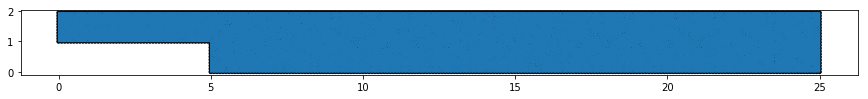

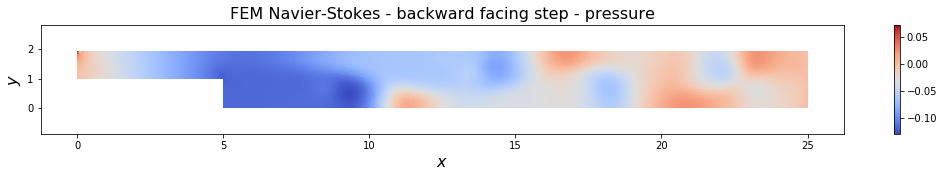

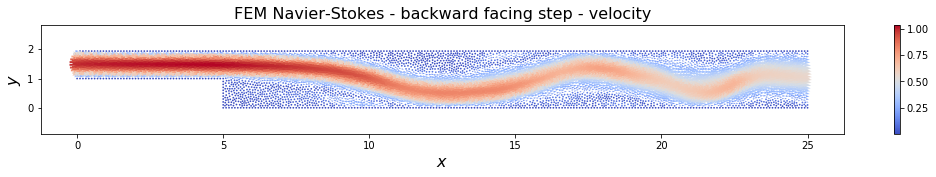

In [30]:
fig = plt.figure(figsize=(15, 2.5))
ax1 = fig.add_subplot(111)
fd.plot(mesh, axes=ax1)

fig = plt.figure(figsize=(18, 2.))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - backward facing step - pressure', fontsize=16)
fd.plot(p_now,axes=ax1)
ax1.axis('equal')

fig = plt.figure(figsize=(18, 2.))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - backward facing step - velocity', fontsize=16)
fd.plot(u_now,axes=ax1)
ax1.axis('equal')

# Summary

We have seen how "local assembly" can be used to formulate discrete problems via the FEM (and developed our own solver from scratch in 1D), and discussed how this approach allows for higher dimensional problems on complex unstructured meshes to be solved.

Rather than doing this ourselves in higher dimensions we briefly demonstrated how the Firedrake library can be used to develop sophisticated FE based solvers for complex problems very rapidly.